# Credit Card Users Churn Prediction

## Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


## Importing necessary libraries

In [160]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    make_scorer
)

from sklearn.model_selection import GridSearchCV, train_test_split

## Loading the dataset

In [161]:
from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/MyDrive/ensemble techniques and model tuning/project/BankChurners.csv"
data = pd.read_csv(url)
df = data.copy()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Overview

- Observations
- Sanity checks

In [162]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [163]:
df.shape

(10127, 21)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [165]:
df.duplicated().value_counts()

False    10127
dtype: int64

In [166]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

* Data contains 10127 rows and 21
* Two columns - Education_Level and Marital_Status have missing values
* There are no duplicate rows
* There are six columns of object type - Attrition_Flag, Gender, Education_Level, Marital_Status, Income_Category, Card_Category.
* All other columns are numerical
* CLIENTNUM column contains unique identifier and can be dropped, it is not useful for analysis

In [167]:
df.drop(columns=['CLIENTNUM'], inplace=True)

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


* Average customer is about 46 years old, has 2 or 3 dependents, been with the bank for about three years and uses 3-4 bank products
* Credit limit on a credit card ranges from approximately 1400 to 34500
* Maximum revolving balance is about 2500.
* Total transaction count in the last 12 months ranges from 10 to 139 transactions
* Average Utilization ratio ranges from 0 to 0.999
* Max credit limit and max Avg_Open_To_Buy are the same number, which implies that customers with the largest credit limit have not used their credit card in the last 12 months

In [169]:
cat_cols=['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category','Card_Category']

for column in cat_cols:
    print(df[column].value_counts())
    print('-'*30)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
------------------------------


* Income column contains category 'abc'. We will treat this as a missing value.


## Exploratory Data Analysis (EDA)

**Questions**:

1. How is the total transaction amount distributed?
2. What is the distribution of the level of education of customers?
3. What is the distribution of the level of income of customers?
4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?
5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?
6. What are the attributes that have a strong correlation with each other?



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [170]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [171]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [172]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [173]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Attrition_Flag

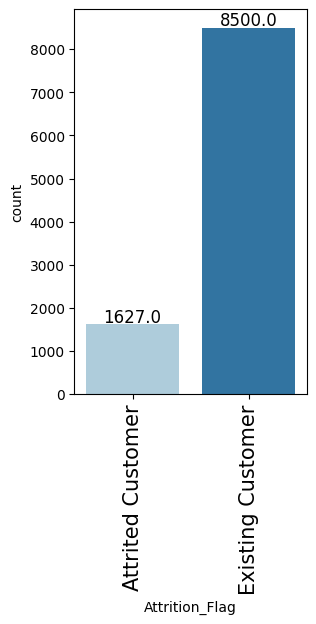

In [174]:
labeled_barplot(df,'Attrition_Flag')

* 16% of customers in the dataset are attrited customers

#### Customer_Age


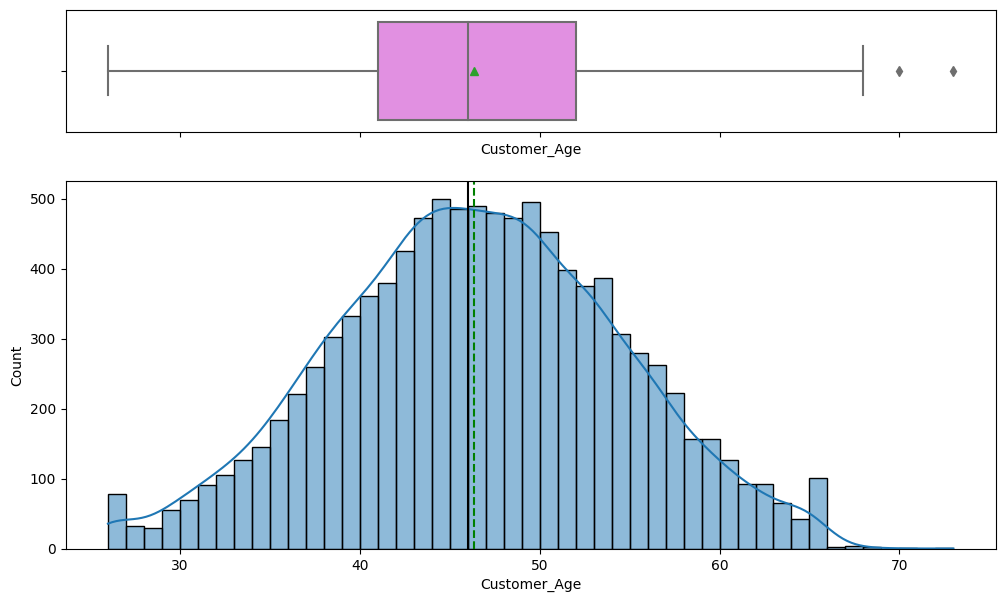

In [175]:
histogram_boxplot(df, "Customer_Age", kde=True)

In [176]:
df["Customer_Age"].describe()

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64

* Customer age has a normal distribution
* This column contains outliers
* Average customer is about 46 years old
* Customers range from 26 to 73 years old


#### Gender: Gender of the account holder


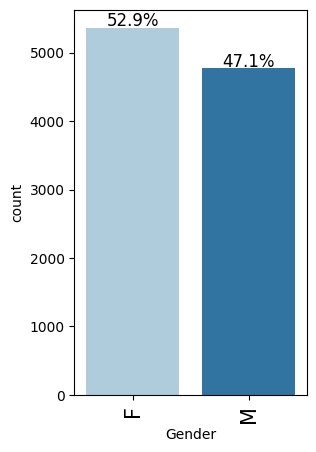

In [177]:
labeled_barplot(df, "Gender", perc=True)

* 52% of the customers in the dataset are Female, 47% are Male

#### Dependent_count: Number of dependents


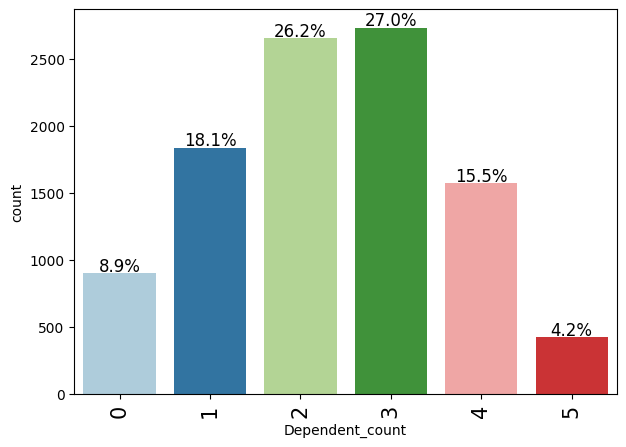

In [178]:
labeled_barplot(df, "Dependent_count", perc=True)

* Number of dependents ranges from 0 to 5
* Customers with no dependents comprise 9% of the data
* Approximately 20 % of customers have more than 3 dependents

#### Education_Level: Educational Qualification of the account holder


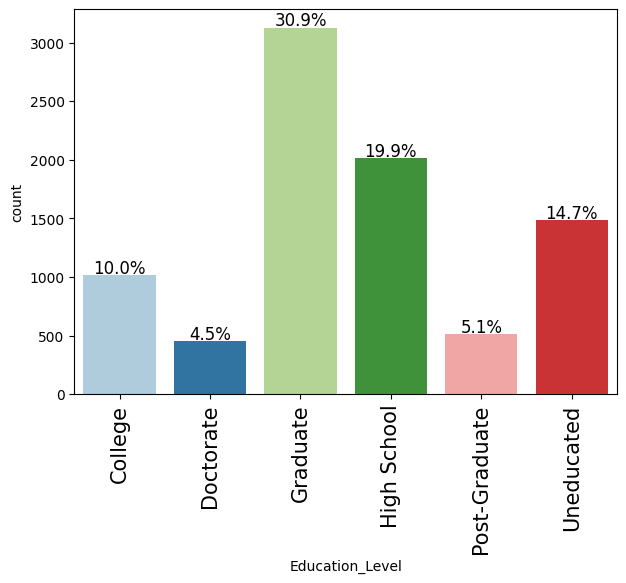

In [179]:
labeled_barplot(df, "Education_Level", perc=True)

* 15% of customers belong to uneducated category. This might represent a missing education information.
* 20% of customers have high school as their highest education level
* The rest of the customers are either college students or have a college or an advanced degree.

#### Marital_Status: Marital Status of the account holder


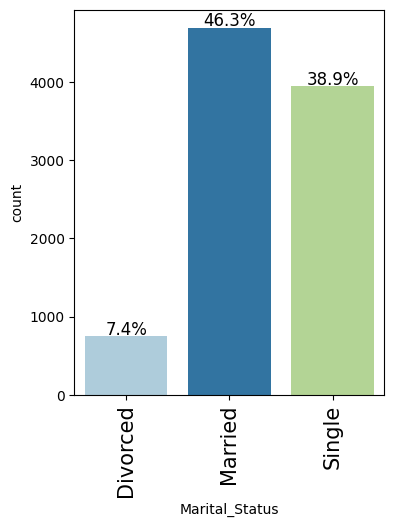

In [180]:
labeled_barplot(df, "Marital_Status", perc=True)

* 46% of the customers are married, 39% are single, 7.5% are divorced

#### Income_Category: Annual Income Category of the account holder


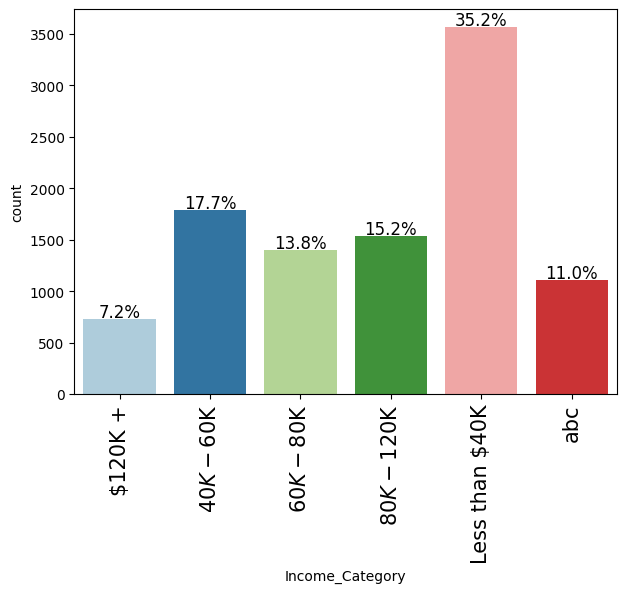

In [181]:
labeled_barplot(df, "Income_Category", perc=True)

* Income information is missing for 11% of customers
* Less that 40K a year is the largest income category, comprising 35% of the customers, followed by 40-60K, and then 80-120K
* 7% of customers are making more than 120K.


#### Card_Category: Type of Card


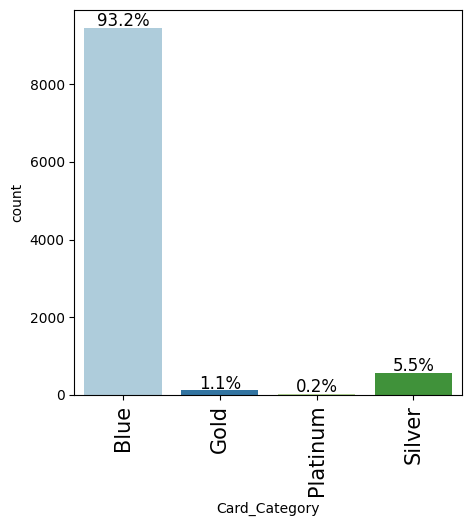

In [182]:
labeled_barplot(df, "Card_Category", perc=True)

* Large majority of the customers (93%) hold Blue card.
* Next popular card is Silver, with 5.5% of the customers

#### Months_on_book: Period of relationship with the bank (in months)


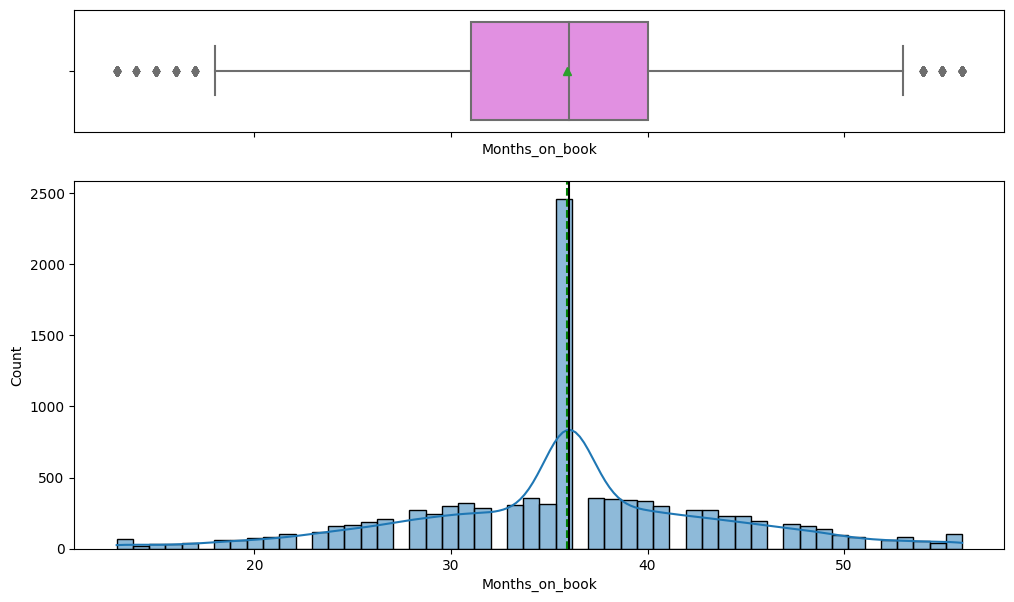

In [183]:
histogram_boxplot(df, "Months_on_book",kde=True)

In [184]:
df["Months_on_book"].describe()

count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

* This column contains outliers
* The distribution is symmetric
* Average customer have been with the bank for approximately 3 years
* Oldest account is 56 months old
* Youngest account is 13 months old, so there were no new customers that opened a credit card account in the last year.
* There is a spike in the data at month 36, ~2400 accounts were opened at that time.

#### Total_Relationship_Count: Total no. of products held by the customer


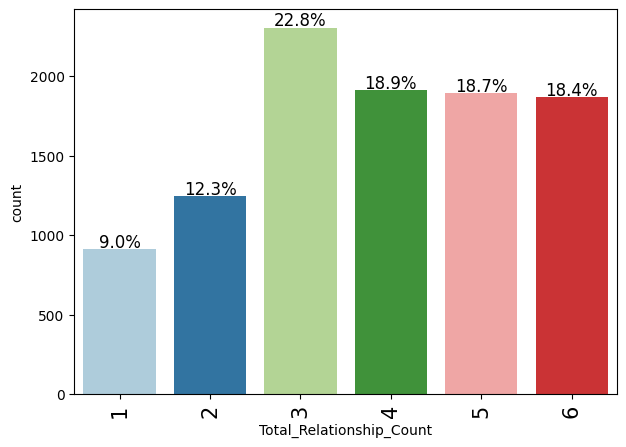

In [185]:
labeled_barplot(df, "Total_Relationship_Count",perc=True)

* Most of the customers (91%) have more than one card
* Number of cards the customers have ranges from 1 to 6
* 12% of the customers have 2 cards

#### Months_Inactive_12_mon: No. of months inactive in the last 12 months


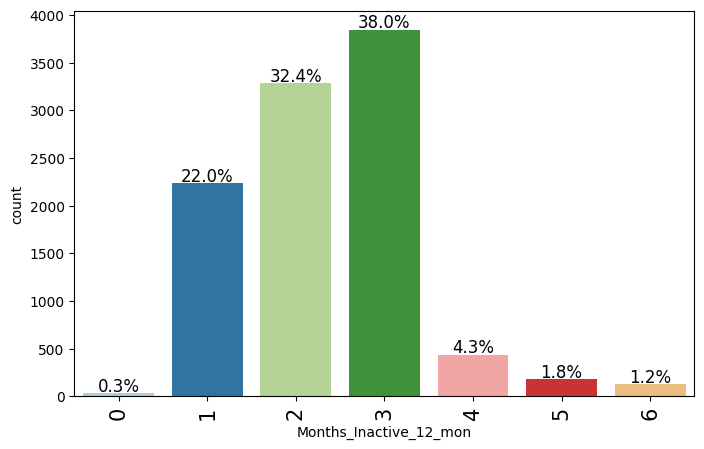

In [186]:
labeled_barplot(df, "Months_Inactive_12_mon",perc=True)

* 92% of the customers have been inactive for a least one month in the last year, out of them - 38% have been inactive for 3 months, 32% inactive for 2 months.
* Less than 1% of customers have been active every month in the last year.
* Most of the customers don't stay inactive for  more than 3 months

#### Contacts_Count_12_mon: No. of Contacts in the last 12 months


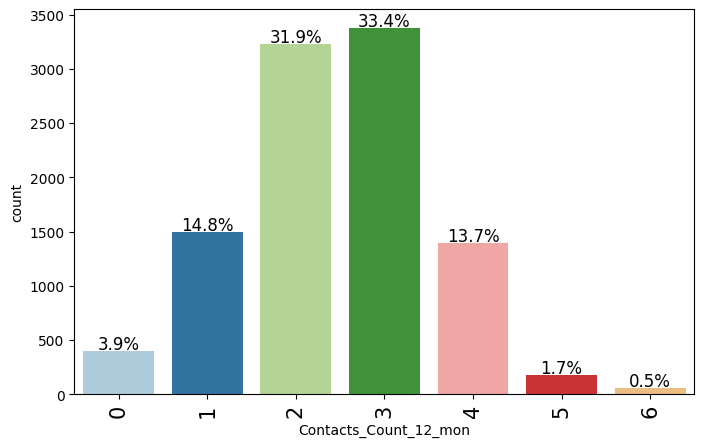

In [187]:
labeled_barplot(df, "Contacts_Count_12_mon",perc=True)

* Only 4% of the customers had no contact with the bank
* Most of the customers had 2 or 3 contacts

#### Credit_Limit: Credit Limit on the Credit Card


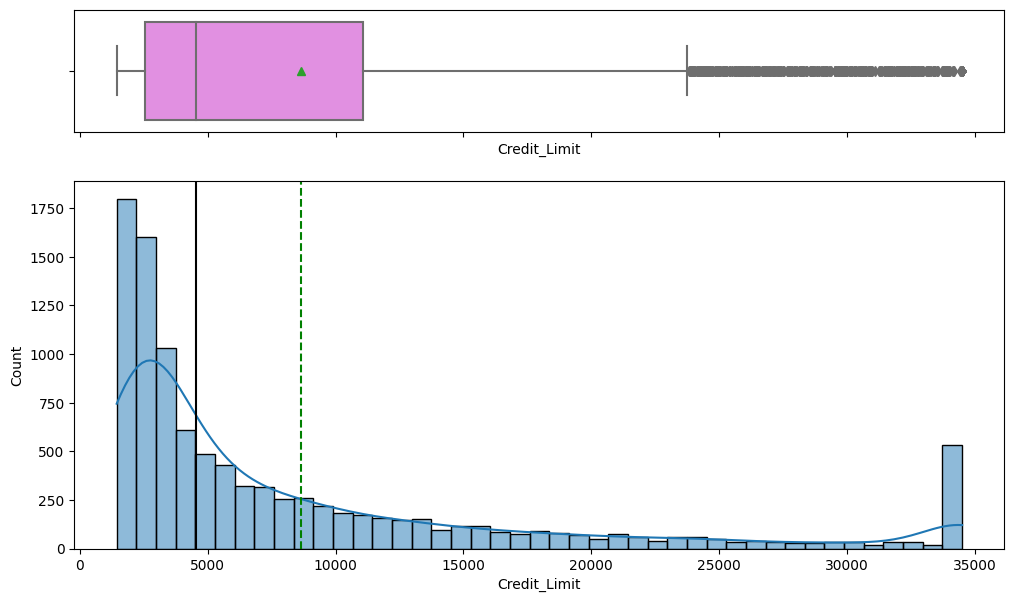

In [188]:
histogram_boxplot(df,"Credit_Limit", kde=True)

In [189]:
df["Credit_Limit"].describe()

count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

* Data in this column is right skewed
* Credi limit ranges from 1400 to 35000, credit limit for 75% is under 11k.
* The column contains a lot of outliers at the right end

#### Total_Revolving_Bal: Total Revolving Balance on the Credit Card


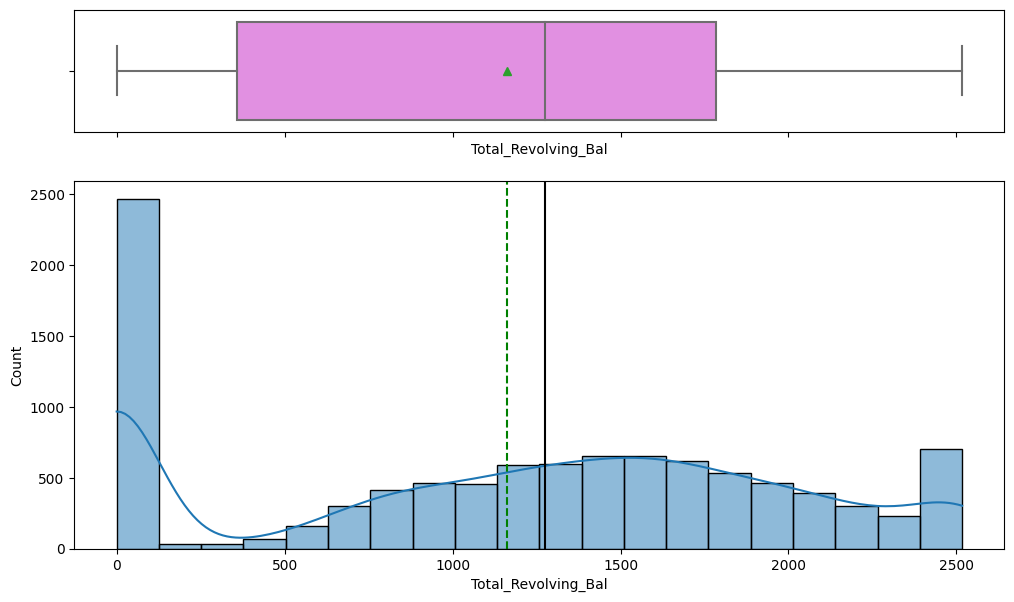

In [190]:
histogram_boxplot(df,"Total_Revolving_Bal", kde=True)

In [191]:
df["Total_Revolving_Bal"].describe()

count    10127.000000
mean      1162.814061
std        814.987335
min          0.000000
25%        359.000000
50%       1276.000000
75%       1784.000000
max       2517.000000
Name: Total_Revolving_Bal, dtype: float64

In [192]:
print("customers with no revolving balance")
df[df["Total_Revolving_Bal"]==0]["Total_Revolving_Bal"].count()/len(df["Total_Revolving_Bal"])*100

customers with no revolving balance


24.390243902439025

* This column doesn't contain outliers
* 24% of customers have no revolving balance
* Maximum revolving balance is 2500

#### Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)


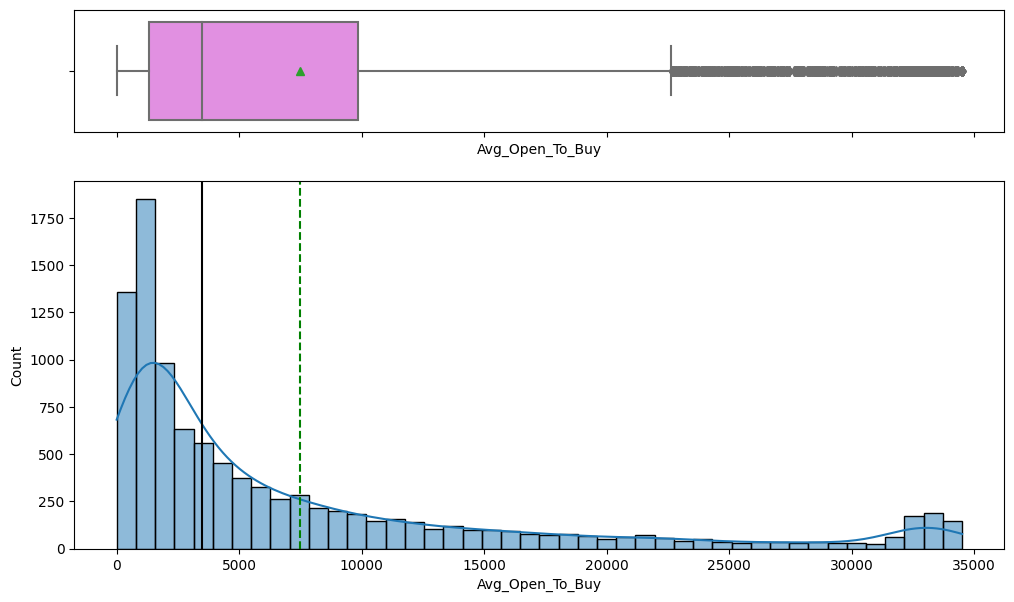

In [193]:
histogram_boxplot(df,"Avg_Open_To_Buy", kde=True)

In [194]:
df["Avg_Open_To_Buy"].describe()

count    10127.000000
mean      7469.139637
std       9090.685324
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      34516.000000
Name: Avg_Open_To_Buy, dtype: float64

* Data in this column is right skewed
* The column contains a lot of outliers at right end
* Avg_Open_To_Buy ranges from 3 to 34500
* Some customers are using all of their available credit

#### Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)


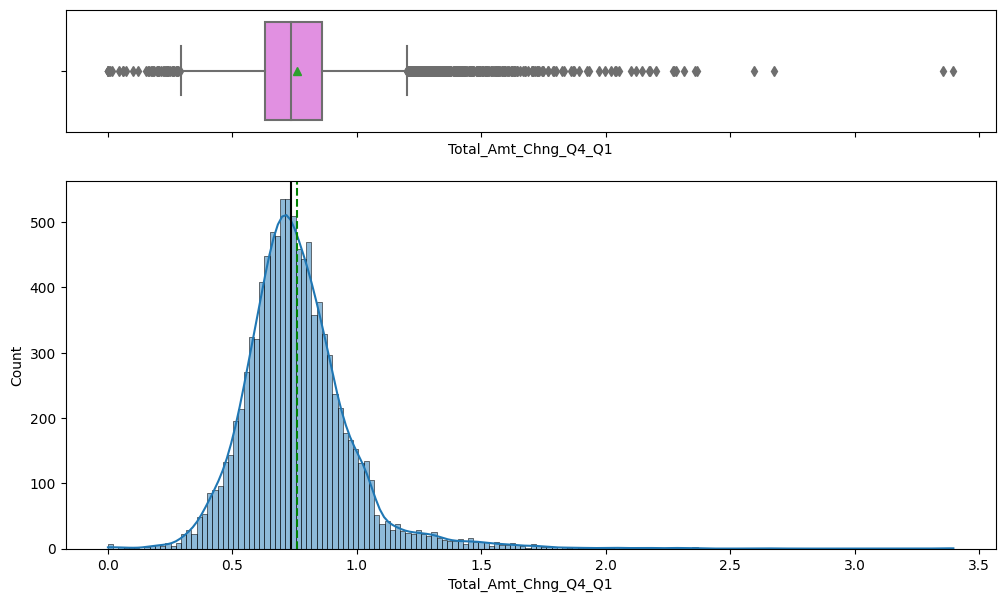

In [195]:
histogram_boxplot(df,"Total_Amt_Chng_Q4_Q1", kde=True)

In [196]:
df["Total_Amt_Chng_Q4_Q1"].describe()

count    10127.000000
mean         0.759941
std          0.219207
min          0.000000
25%          0.631000
50%          0.736000
75%          0.859000
max          3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

In [197]:
df[df["Total_Amt_Chng_Q4_Q1"]<1]["Total_Amt_Chng_Q4_Q1"].count()/len(df)

0.9012540732694776

* Values in this column range from zero to 3.39
* This column contains a lot of outliers
* This is a normal distribution with a long tail to the right
* 90% of the customers have decreased their credit card spending in Q4 compared to Q1.

#### Total_Trans_Amt: Total Transaction Amount (Last 12 months)


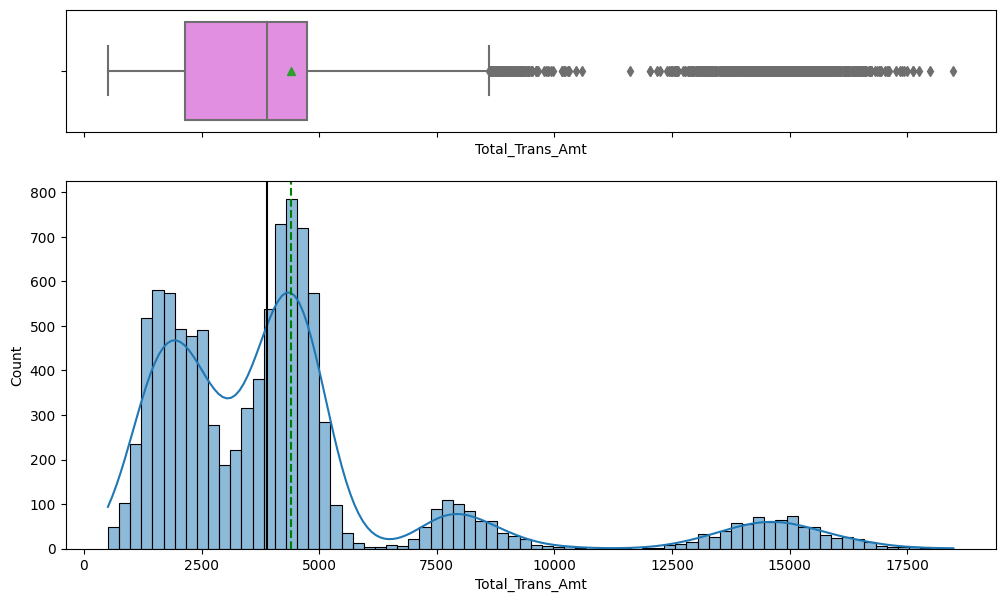

In [198]:
histogram_boxplot(df,"Total_Trans_Amt", kde=True)

In [199]:
df["Total_Trans_Amt"].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

* Data in this column skewed to the right
* There are a lot of outliers at the right end of the distribution
* Values range from 510 to 18484
* 75% of customers have spent less than 5000 in the last 12 months


#### Total_Trans_Ct: Total Transaction Count (Last 12 months)


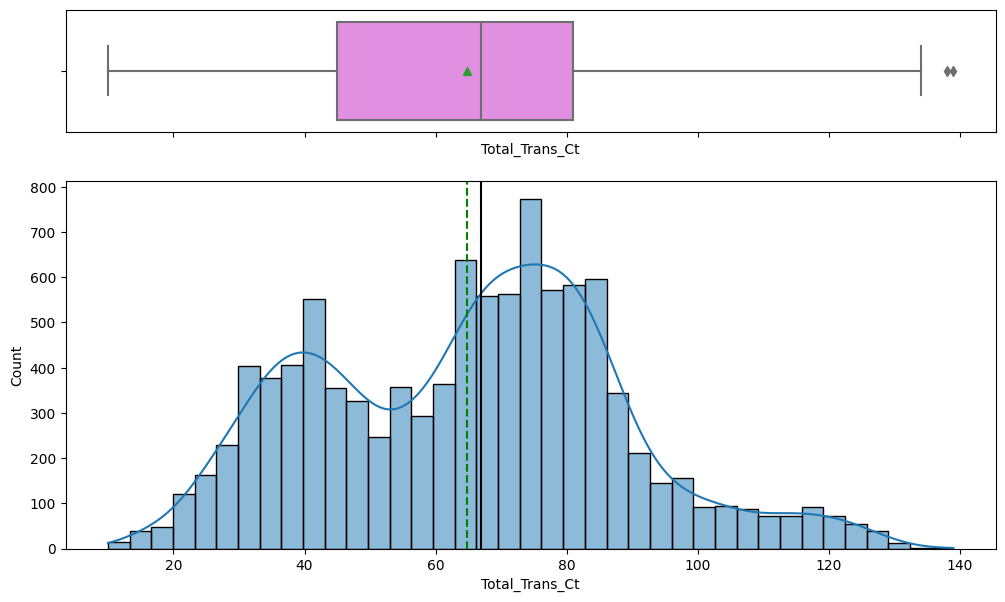

In [200]:
histogram_boxplot(df,"Total_Trans_Ct", kde=True)

In [201]:
df["Total_Trans_Ct"].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

* Values range from 10 to 139 transactions in the last 12 months
* 50% of the customers making 5-6 transactions a month.
* There are outliers in this column

#### Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)


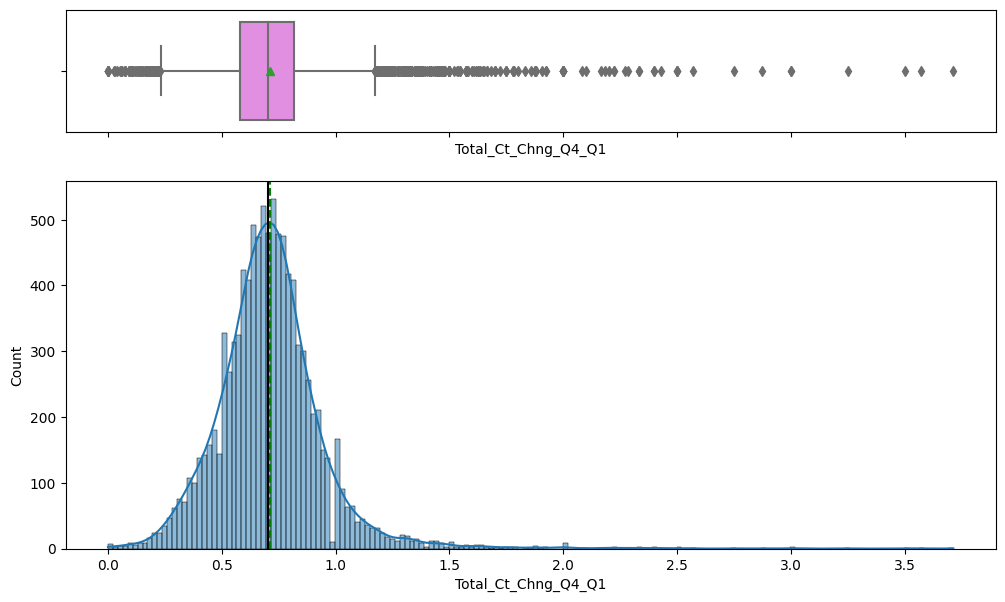

In [202]:
histogram_boxplot(df,"Total_Ct_Chng_Q4_Q1", kde=True)

In [203]:
df["Total_Ct_Chng_Q4_Q1"].describe()

count    10127.000000
mean         0.712222
std          0.238086
min          0.000000
25%          0.582000
50%          0.702000
75%          0.818000
max          3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

In [204]:
df[df["Total_Ct_Chng_Q4_Q1"]<1]["Total_Ct_Chng_Q4_Q1"].count()/len(df["Total_Ct_Chng_Q4_Q1"])

0.9176458971067444

* There are a lot of outliers in this column at both ends of the distribution
* Distribution looks normal with a long right tail
* 92% of the customers have reduced how often they use their credit cards in Q4 compared to Q1.
* On average customers reduced frequency of their credit card usage by 30% in Q4 compared to Q1.

#### Avg_Utilization_Ratio: Average Card Utilization Ratio

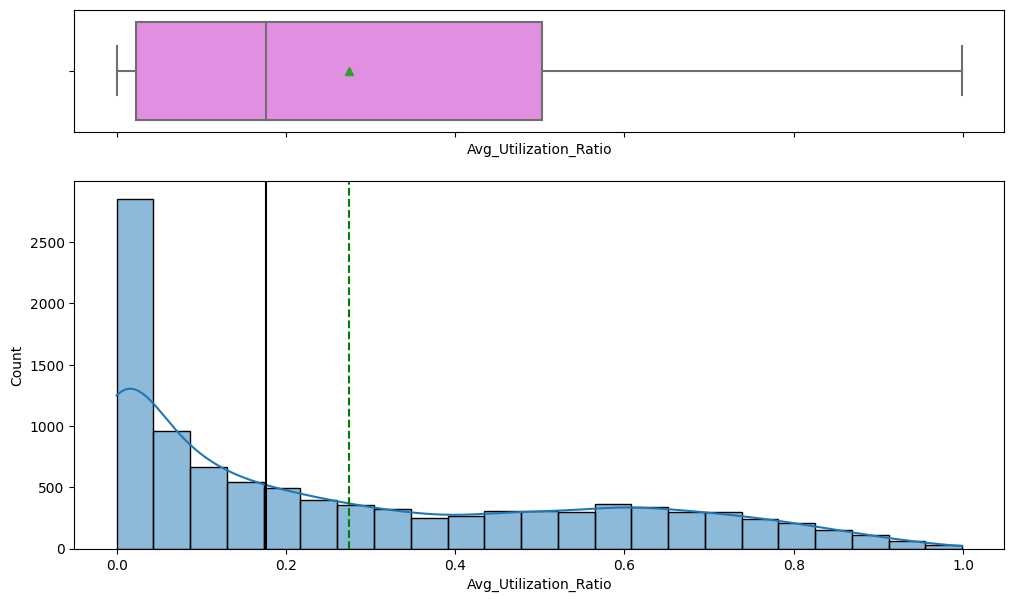

In [205]:
histogram_boxplot(df,"Avg_Utilization_Ratio", kde=True)

In [206]:
df["Avg_Utilization_Ratio"].describe()

count    10127.000000
mean         0.274894
std          0.275691
min          0.000000
25%          0.023000
50%          0.176000
75%          0.503000
max          0.999000
Name: Avg_Utilization_Ratio, dtype: float64

In [207]:
df[df["Avg_Utilization_Ratio"]<=0.05]["Avg_Utilization_Ratio"].count()/len(df["Avg_Utilization_Ratio"])*100

29.8113952799447

* Distribution is skewed to the right
* 75% of the customers are using half or less of their available credit
* Close to 30% of the customers use 5% or less of their available credit
* A small number of customers have utilization ratio close to 100%

### BiVariate Analysis

#### Correlation

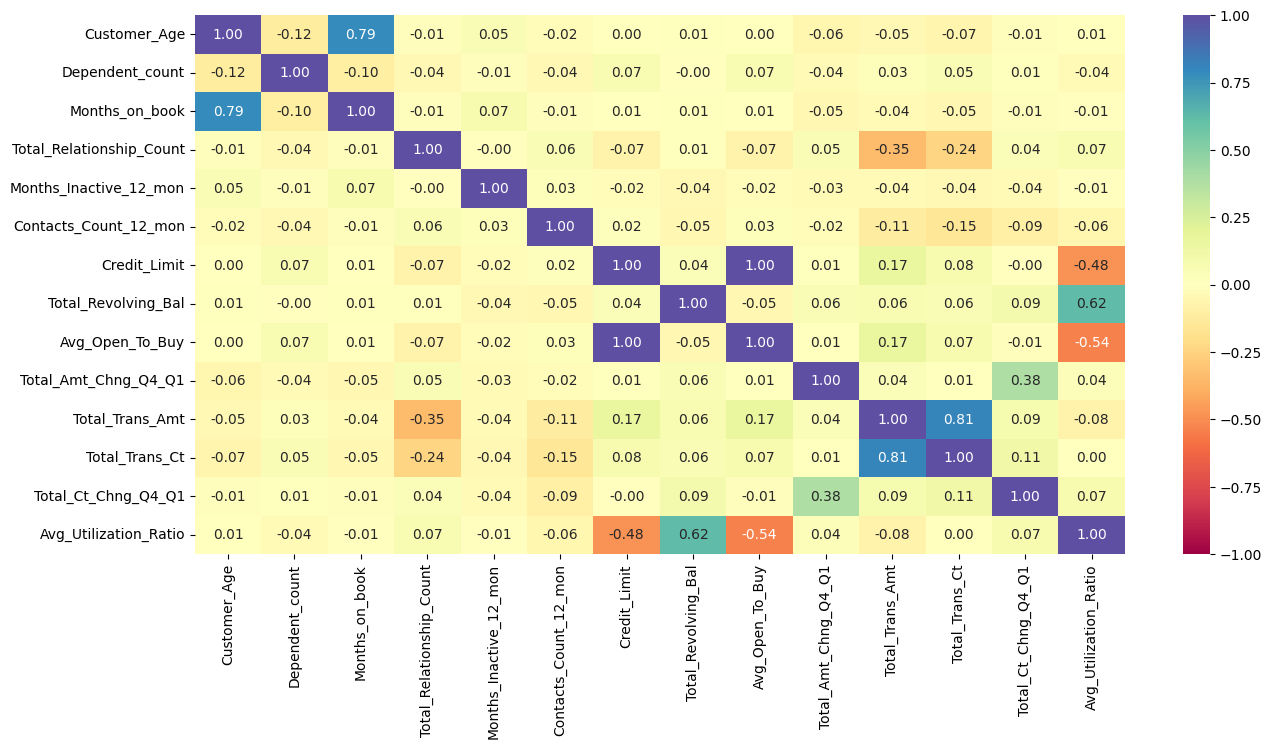

In [208]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Correlation between Credit_Limit and Avg_Open_To_Buy is 1, we can drop one of these columns without affecting the analysis.
* Total_Trans_Amt is strongly positively correlated with Total_Trans_Ct
* Customer_Age and Months_on_book are strongly positively correlated
* Total_Revolving_Bal and Avg_Utilization_Ratio have a positive correlation
* Avg_Utilization_Ratio and Avg_Open_To_Buy have a negative correlation.
* Other variables have no significant correlation between them


#### Customer_Age vs Attrition_Flag


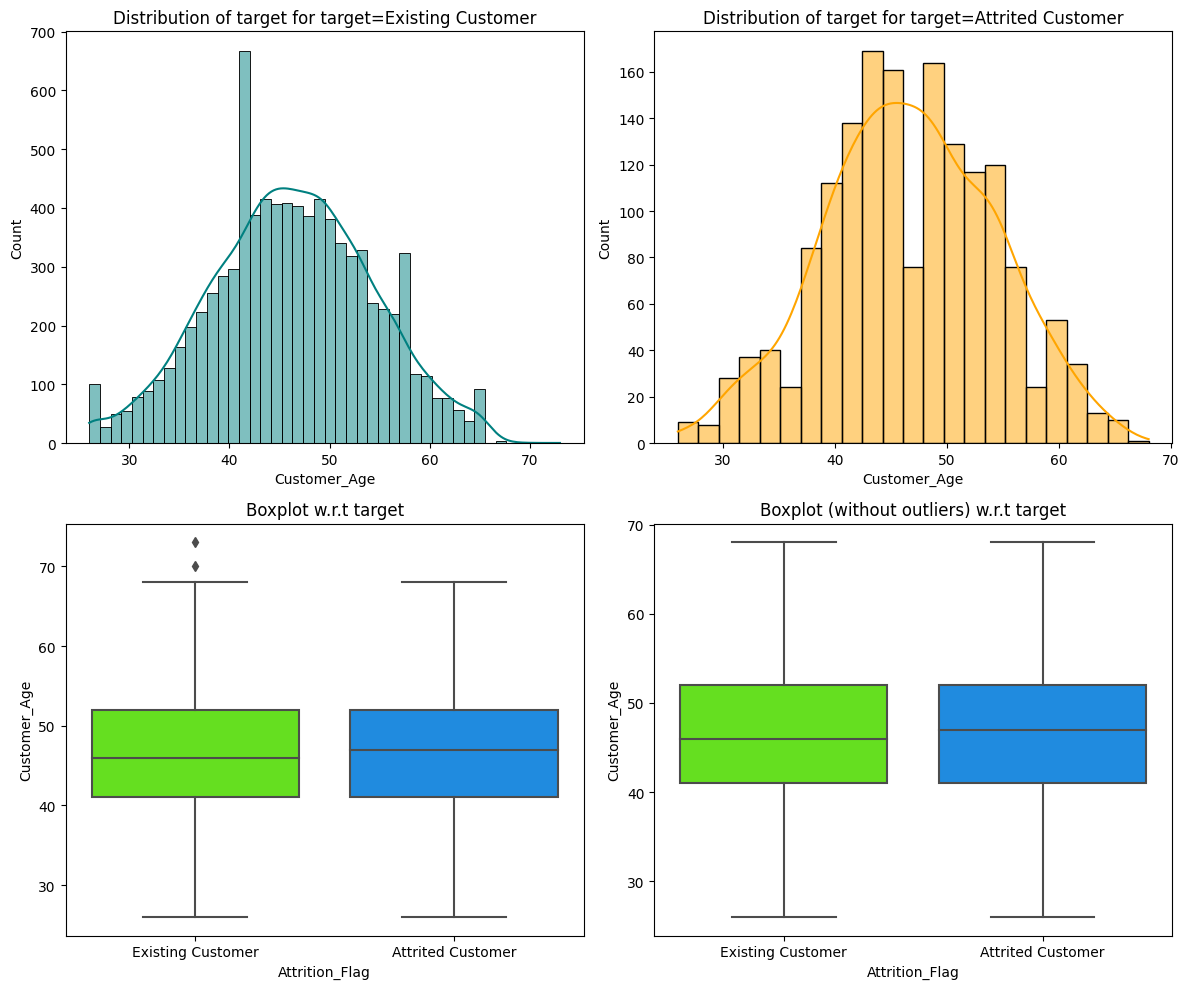

In [209]:
distribution_plot_wrt_target(df, "Customer_Age", "Attrition_Flag")

* Median age of attrited customers is slightly higher than age existing customers. The difference is very small.
* There is large spike at 41 for existing customers, which is absent for attrited customers.

#### Gender vs Attrition_Flag


Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


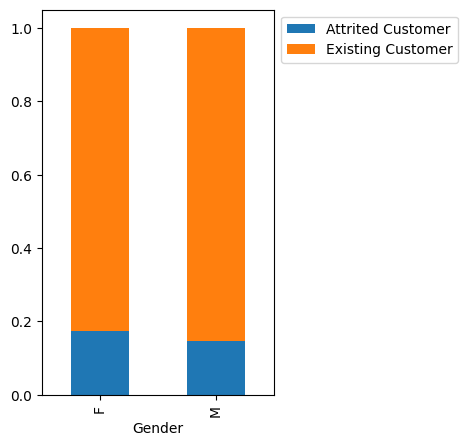

In [210]:
stacked_barplot(df, "Gender", "Attrition_Flag")

* Female customers are slightly more likey to discontinue their relationship with the bank compared to male customers. The difference is very small.

#### Dependent_count vs Attrition_Flag


Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


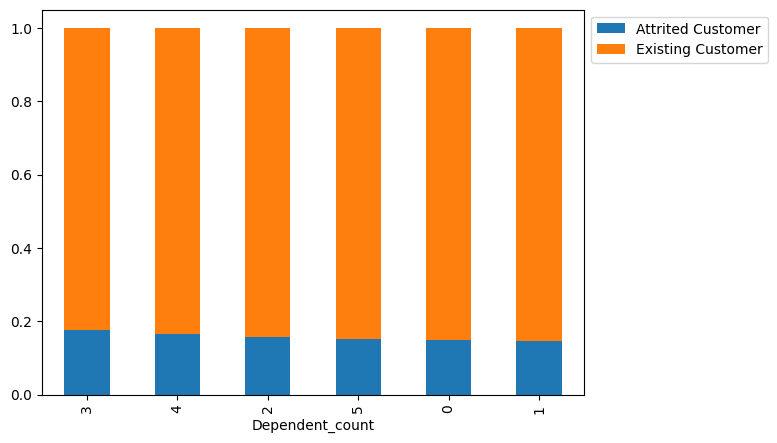

In [211]:
stacked_barplot(df, "Dependent_count", "Attrition_Flag")

* Customers with 3 or 4 dependents are slightly more likely to discontinue their relationship with the bank compared to other customers. The difference is very subtle.

#### Education_Level vs Attrition_Flag


Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


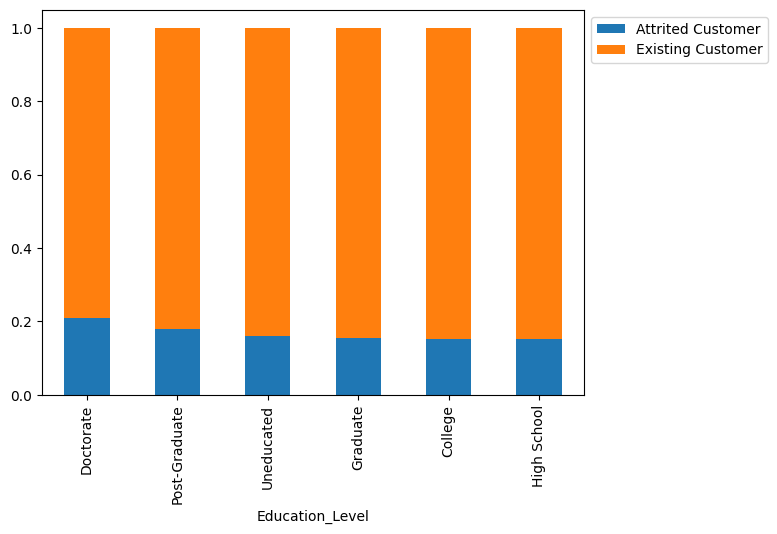

In [212]:
stacked_barplot(df, "Education_Level", "Attrition_Flag")

* Customers with Doctorate or Post-Graduate degrees are slightly more likely to discontinue their relationship with the bank compared to other customers.
* The difference is very small. It is unlikely that education will be a strong predictor of attrition.

#### Marital_Status vs Attrition_Flag


Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


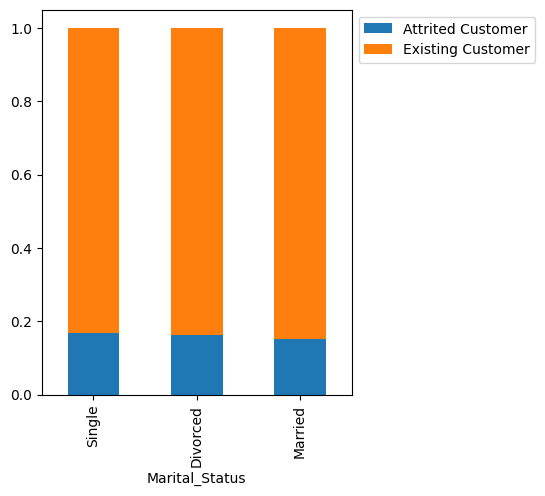

In [213]:
stacked_barplot(df, "Marital_Status", "Attrition_Flag")

* Marital status doesn't seem to make any significant difference on whether the customer stay with the bank or leave

#### Income_Category vs Attrition_Flag


Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


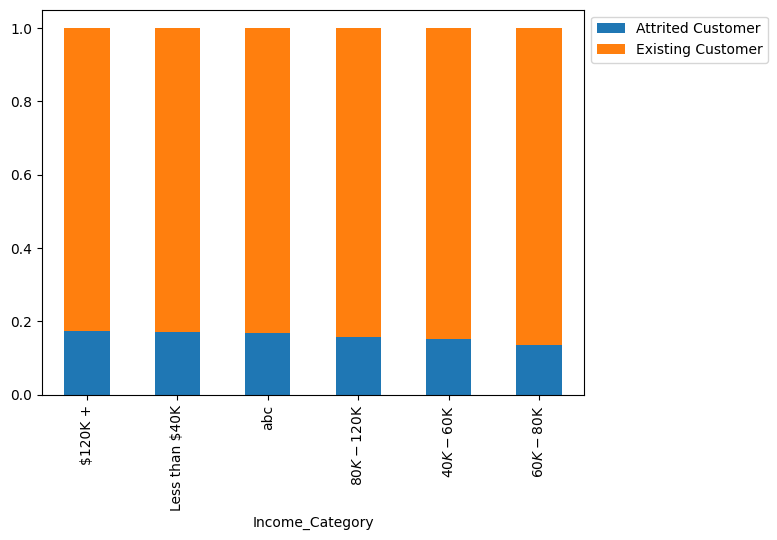

In [214]:
stacked_barplot(df, "Income_Category", "Attrition_Flag")

* Income Category doesn't seem to make any significant difference on whether the customer stay with the bank or leave

#### Card_Category vs Attrition_Flag


Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


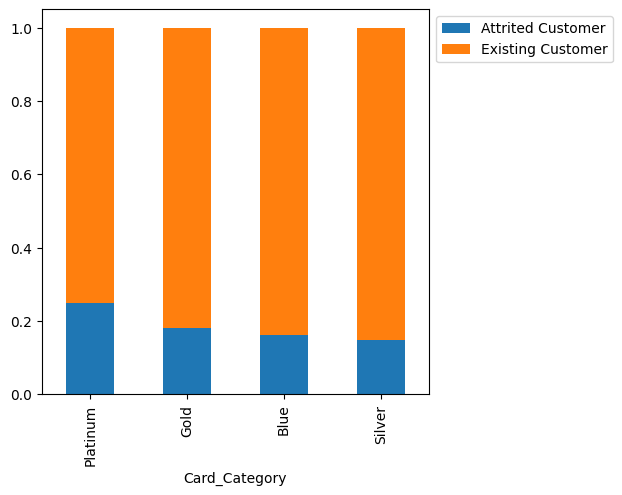

In [215]:
stacked_barplot(df, "Card_Category", "Attrition_Flag")

* Customers with Platinum card are more likely to close their credit card accounts with the bank.

#### Months_on_book vs Attrition_Flag


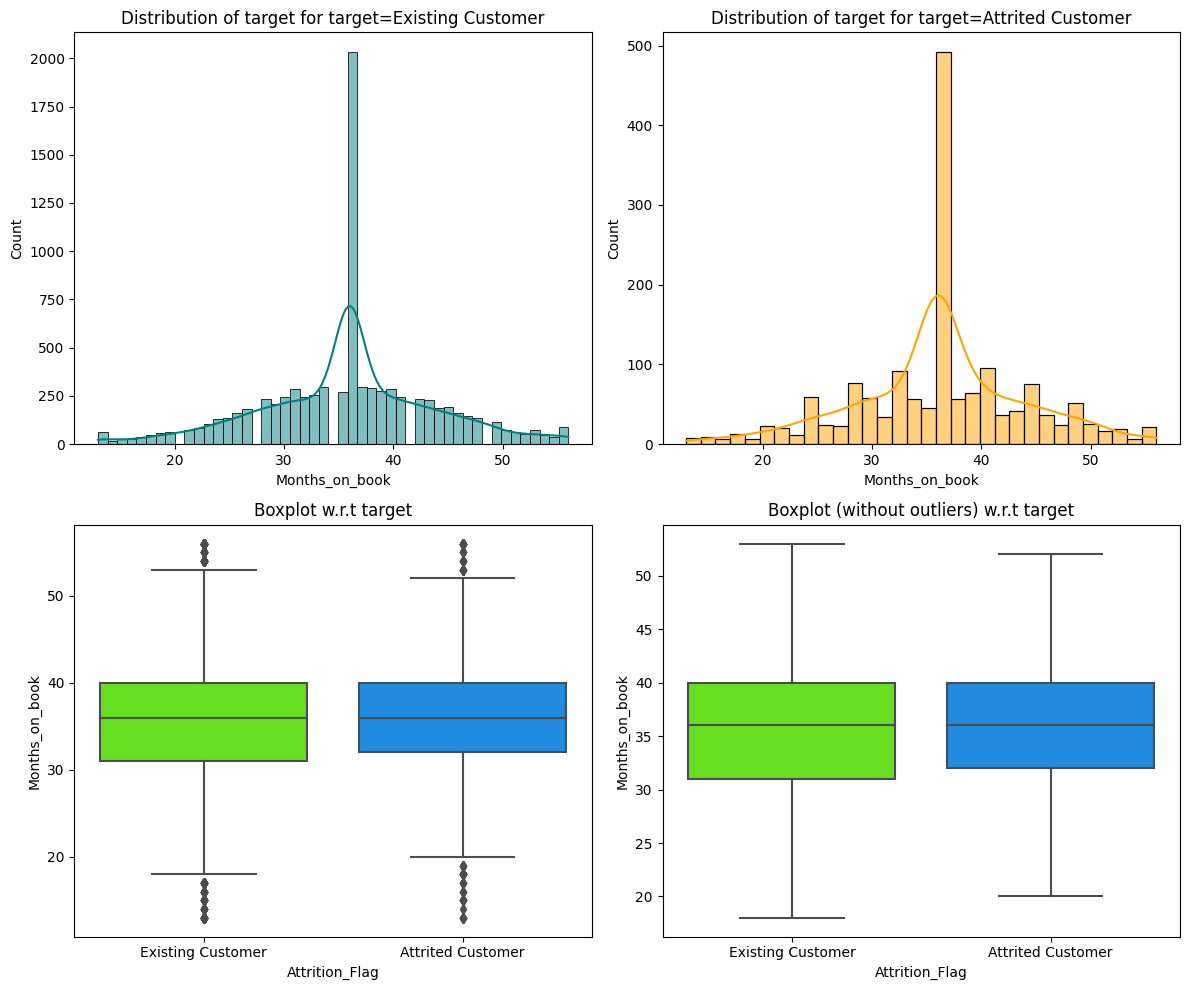

In [216]:
distribution_plot_wrt_target(df, "Months_on_book", "Attrition_Flag")

* Median values for Months on book are the same for existing and attritted customers
* There is a spike in the data  at 36-37 months for both existing and attritted customers

#### Total_Relationship_Count vs Attrition_Flag


Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


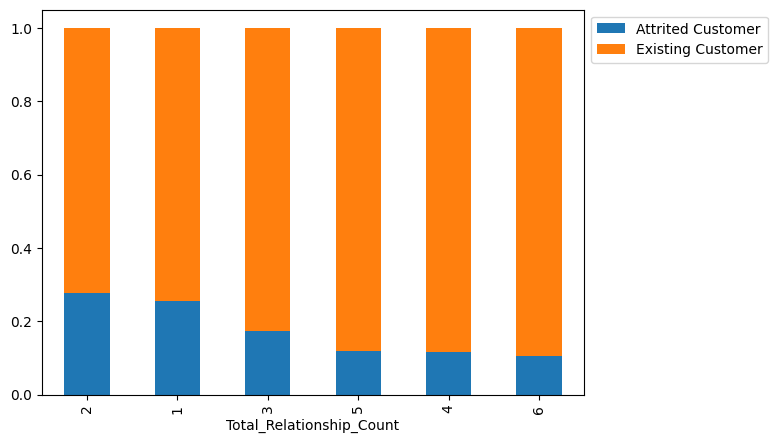

In [217]:
stacked_barplot(df, "Total_Relationship_Count", "Attrition_Flag")

* Customers that hold more than three card are less likely to leave compared with other customers
* Customers with 2 cards are most likely to leave, followed by customers with 1 card.

#### Months_Inactive_12_mon vs Attrition_Flag


Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


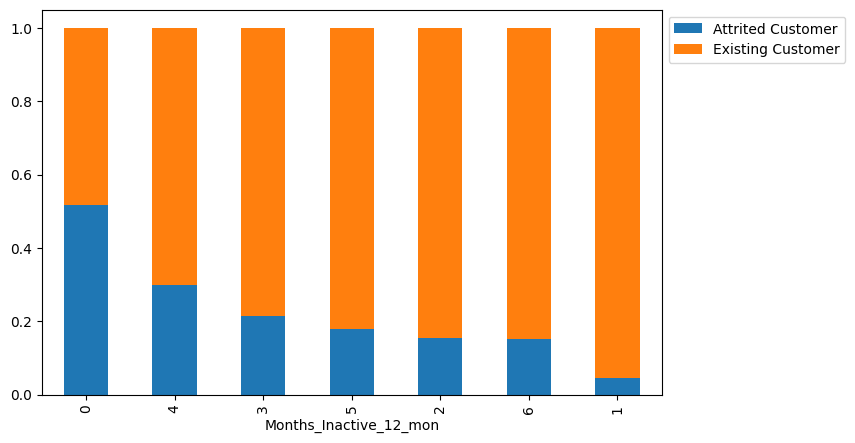

In [218]:
stacked_barplot(df, "Months_Inactive_12_mon", "Attrition_Flag")

* Customers that haven't been inactive are the most likely to leave, followed by customers that have been inactive for four months.
* Customers that have been inactive for only one month out of the last twelve are the least likely to discontinue their relashionship with the bank.

#### Contacts_Count_12_mon vs Attrition_Flag


Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


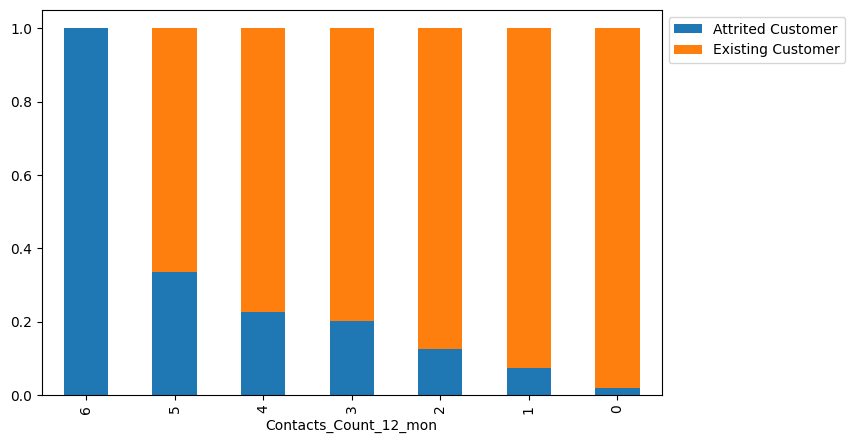

In [219]:
stacked_barplot(df, "Contacts_Count_12_mon", "Attrition_Flag")

* 100% of customers who have contacted the bank 6 times have closed their credit card accounts. Perphaps customers were trying to resolve a problem before giving up and leaving.
* Likelihood of customer quitting increased with the number of contacts they had with the bank.

#### Credit_Limit s Attrition_Flag


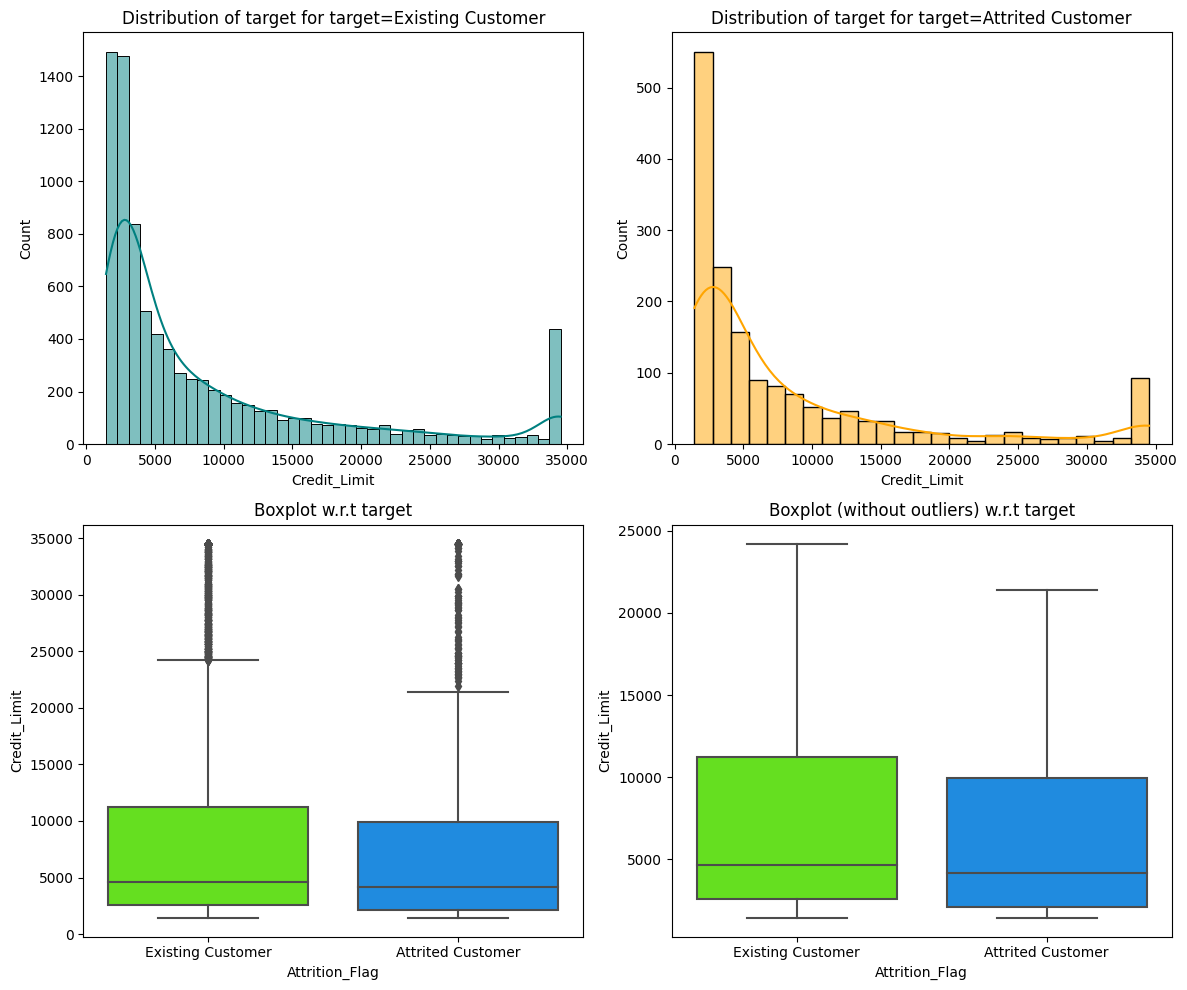

In [220]:
distribution_plot_wrt_target(df, "Credit_Limit","Attrition_Flag")

* Credit Limit range is wider for Existing Customers compared to Attrited Customers.

#### Total_Revolving_Bal vs Attrition_Flag


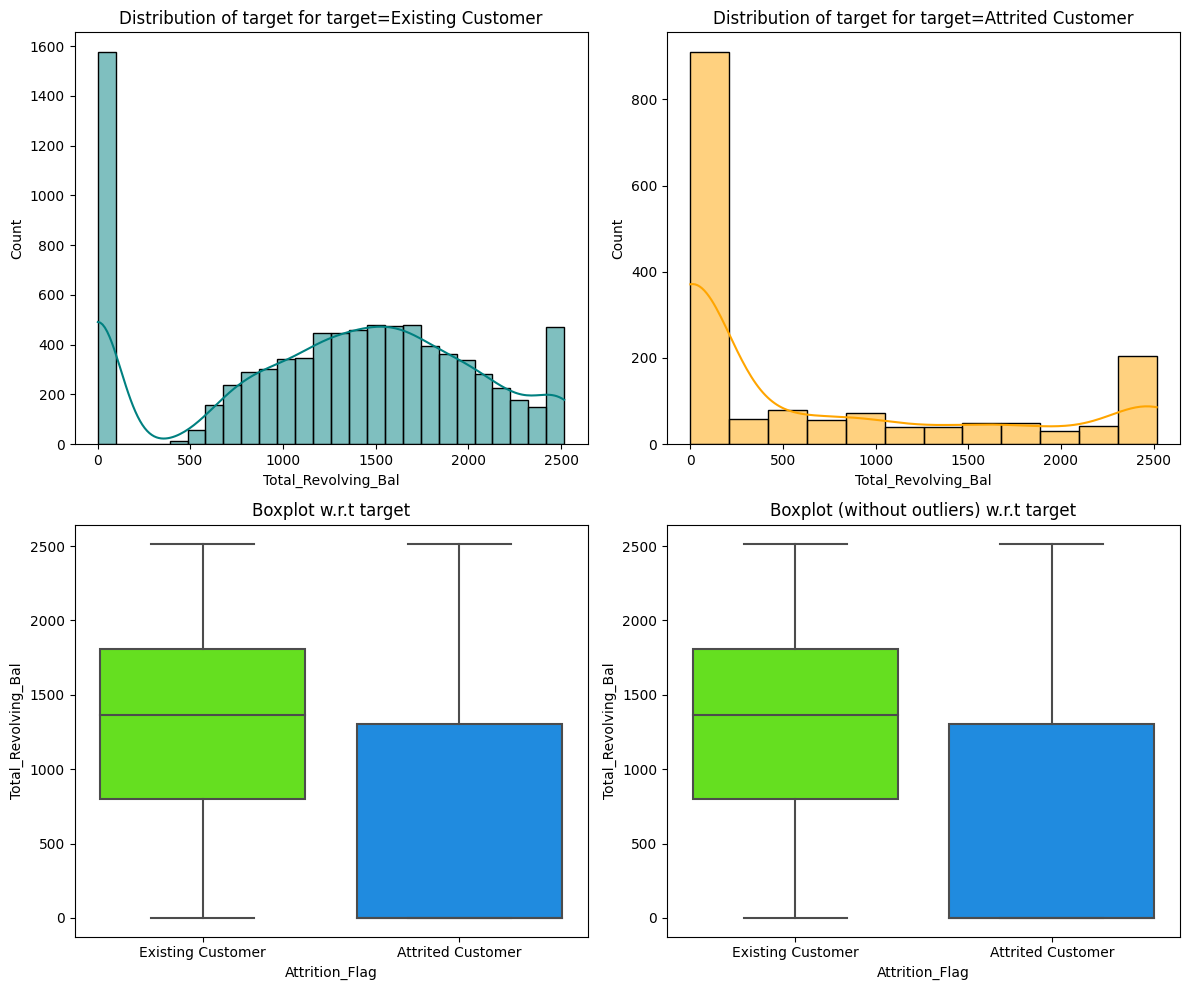

In [221]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal","Attrition_Flag")

* Attrited customers had lower revolving balances compared to Existing customers. Perhaps having lower revolving balances made it easier to pay off the credit cards and leave.

#### Avg_Open_To_Buy vs Attrition_Flag


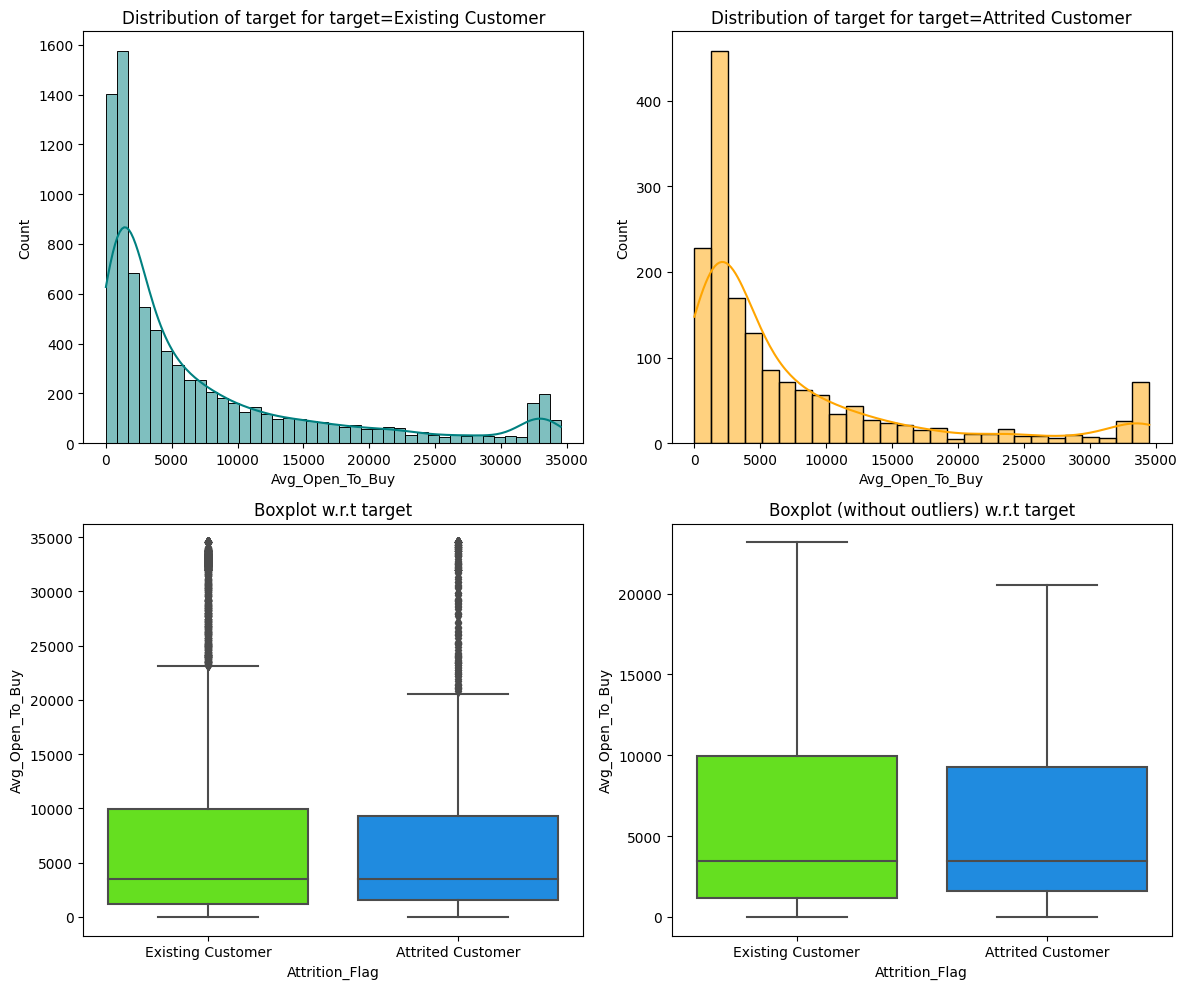

In [222]:
distribution_plot_wrt_target(df, "Avg_Open_To_Buy","Attrition_Flag")

* Avg_Open_To_Buy doesn't seem to have large effect on Attrition. The two distributions look very similar.

#### Total_Amt_Chng_Q4_Q1 vs Attrition_Flag


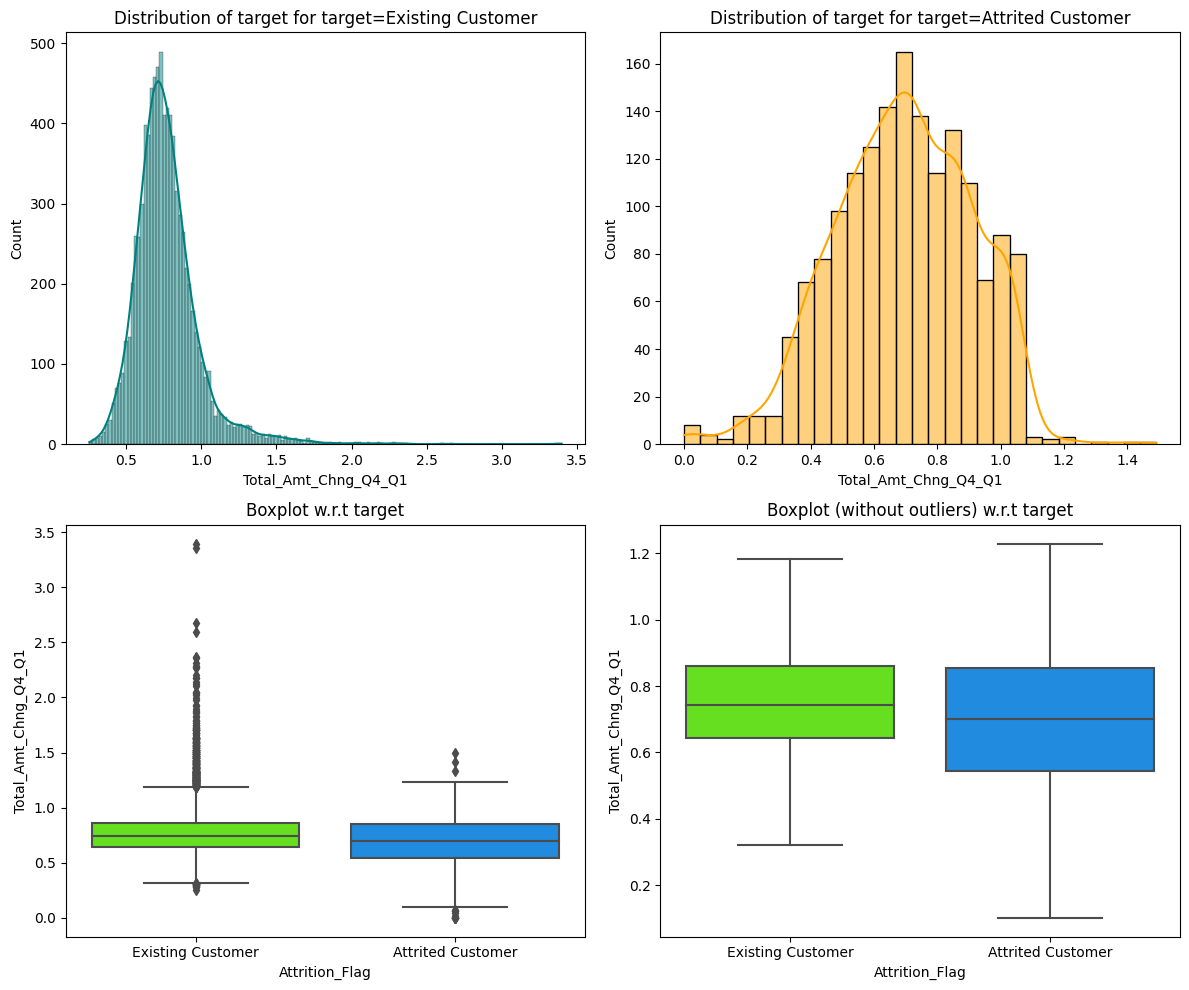

In [223]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1","Attrition_Flag")

In [224]:
df[df["Attrition_Flag"]=="Attrited Customer"]["Total_Amt_Chng_Q4_Q1"].describe()

count    1627.000000
mean        0.694277
std         0.214924
min         0.000000
25%         0.544500
50%         0.701000
75%         0.856000
max         1.492000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

In [225]:
df[df["Attrition_Flag"]=="Existing Customer"]["Total_Amt_Chng_Q4_Q1"].describe()

count    8500.000000
mean        0.772510
std         0.217783
min         0.256000
25%         0.643000
50%         0.743000
75%         0.860000
max         3.397000
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

* There is a wider range of Total_Amt_Chng_Q4_Q1 for attrited customers compared to existing customers.
* On average, Attrited customers reduced their credit card usage by a larger amount compared to Existing customers.
* Attrited customers who have increased their credit card usage, increased it by a smaller amount than Existing customers.

#### Total_Trans_Amt vs Attrition_Flag


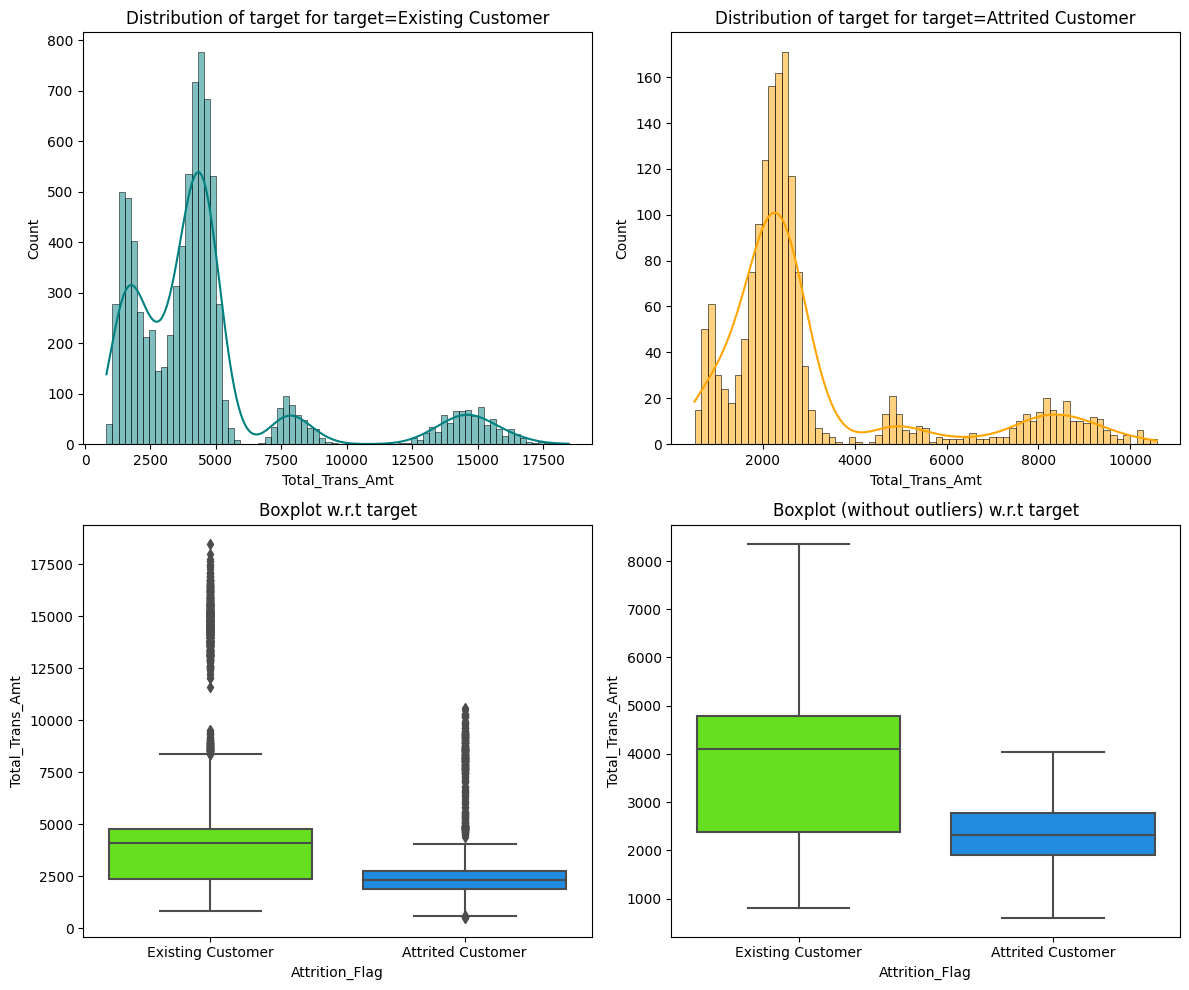

In [226]:
distribution_plot_wrt_target(df, "Total_Trans_Amt","Attrition_Flag")

* Attrited customers had smaller transaction amounts compared to Existing customers.

#### Total_Trans_Ct vs Attrition_Flag


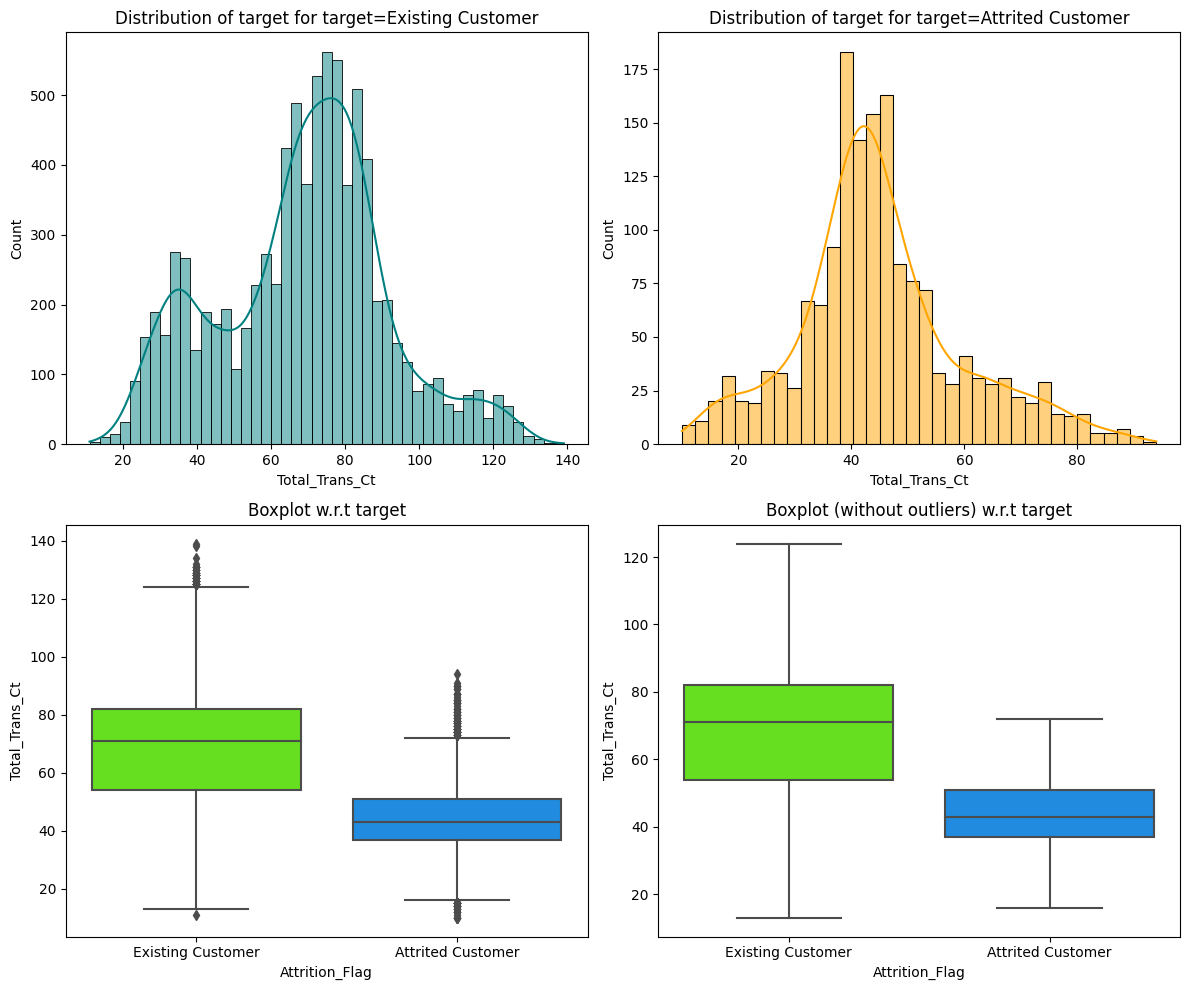

In [227]:
distribution_plot_wrt_target(df, "Total_Trans_Ct","Attrition_Flag")

* Attrited customers have used their cards significantly less often than existing customers.

#### Total_Ct_Chng_Q4_Q1 vs Attrition_Flag


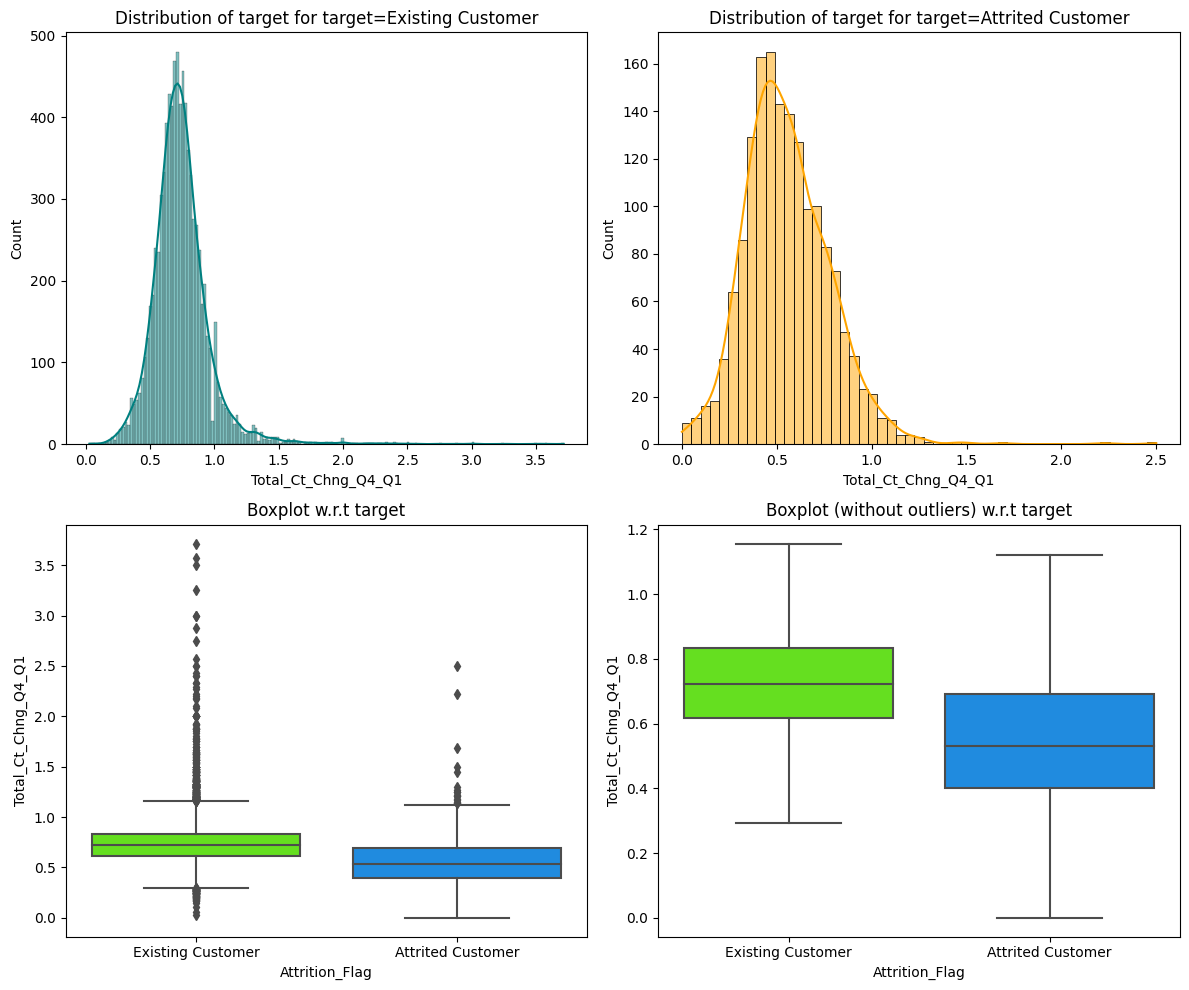

In [228]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1","Attrition_Flag")

* Both categories of customers have reduced how often they use their credit card in Q4 compared to Q1.
* Attrited Customers have shown larger decrease in usage frequency compared to existing customers.

#### Avg_Utilization_Ratio vs Attrition_Flag

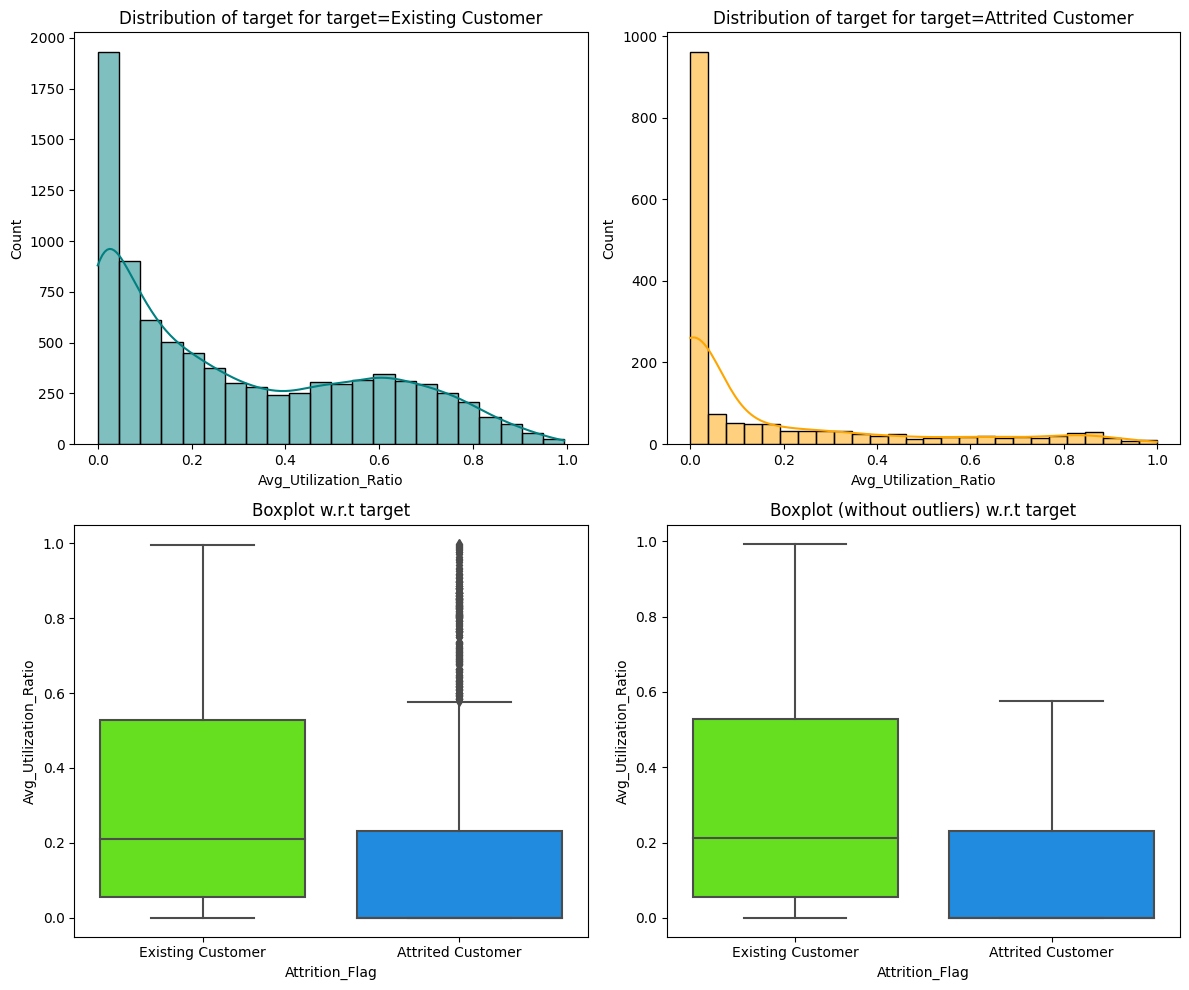

In [229]:
distribution_plot_wrt_target(df, "Avg_Utilization_Ratio","Attrition_Flag")

In [230]:
df[df["Attrition_Flag"]=="Attrited Customer"]["Avg_Utilization_Ratio"].describe()

count    1627.000000
mean        0.162475
std         0.264458
min         0.000000
25%         0.000000
50%         0.000000
75%         0.231000
max         0.999000
Name: Avg_Utilization_Ratio, dtype: float64

* Customers with lower utilization ratio are more likely to leave the bank
* 75% of attrited customers have utilization ratio below 23%
* 50% of attrited customers have not been using their cards.

## Data Pre-processing

In [231]:
Q1 = df.quantile(0.25)  # To find the 25th percentile
Q3 = df.quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [232]:
# checking the % outliers
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Customer_Age                0.019749
Dependent_count             0.000000
Months_on_book              3.811593
Total_Relationship_Count    0.000000
Months_Inactive_12_mon      3.268490
Contacts_Count_12_mon       6.211119
Credit_Limit                9.716599
Total_Revolving_Bal         0.000000
Avg_Open_To_Buy             9.509233
Total_Amt_Chng_Q4_Q1        3.910339
Total_Trans_Amt             8.847635
Total_Trans_Ct              0.019749
Total_Ct_Chng_Q4_Q1         3.890590
Avg_Utilization_Ratio       0.000000
dtype: float64

* Some columns have almost 10% of the data points that are considered outliers.
* This data comes from the bank. Given stringent document and accounting requirements every bank needs to follow, we can assume that data is correct and outliers represent actual variations in the data.
* We will not treat the outliers since we want our model to learn from such variations.

In [233]:
df["Income_Category"].replace("abc", np.nan, inplace=True)

In [234]:
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Three columns - "Education_Level", "Marital_Status", and "Income_Category" have missing values. We will take care of them after splitting the data.
* Credit_Limit and Avg_Open_To_Buy columns were perfectly correlated, so we will drop the Avg_Open_To_Buy column.

In [235]:
X = df.drop(["Attrition_Flag", "Avg_Open_To_Buy"], axis=1)

# We will use 1 for Attrited customers and 0 for Existing customers
y = df["Attrition_Flag"].apply(lambda x: 1 if x == "Attrited Customer" else 0)

In [236]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp)

print(X_train.shape, X_val.shape, X_test.shape)

(8101, 18) (507, 18) (1519, 18)


## Missing value imputation




In [237]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

In [238]:
cat_cols = list(X_train.select_dtypes(include='object').columns)

In [239]:
X_train[cat_cols] = imputer.fit_transform(X_train[cat_cols])
X_val[cat_cols] = imputer.transform(X_val[cat_cols])
X_test[cat_cols] = imputer.transform(X_test[cat_cols])

In [240]:
# checking that there are no surprises in the categorical columns after transformation
for column in cat_cols:
    print(X_train[column].value_counts())
    print('-'*30)

F    4288
M    3813
Name: Gender, dtype: int64
------------------------------
Graduate         3699
High School      1632
Uneducated       1187
College           817
Post-Graduate     413
Doctorate         353
Name: Education_Level, dtype: int64
------------------------------
Married     4376
Single      3139
Divorced     586
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    3740
$40K - $60K       1420
$80K - $120K      1246
$60K - $80K       1110
$120K +            585
Name: Income_Category, dtype: int64
------------------------------
Blue        7560
Silver       436
Gold          90
Platinum      15
Name: Card_Category, dtype: int64
------------------------------


In [241]:
for column in cat_cols:
    print(X_val[column].value_counts())
    print('-'*30)

F    260
M    247
Name: Gender, dtype: int64
------------------------------
Graduate         246
High School       85
Uneducated        73
College           56
Post-Graduate     27
Doctorate         20
Name: Education_Level, dtype: int64
------------------------------
Married     292
Single      185
Divorced     30
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    228
$40K - $60K       100
$60K - $80K        75
$80K - $120K       75
$120K +            29
Name: Income_Category, dtype: int64
------------------------------
Blue        468
Silver       30
Gold          8
Platinum      1
Name: Card_Category, dtype: int64
------------------------------


In [242]:
for column in cat_cols:
    print(X_test[column].value_counts())
    print('-'*30)

F    810
M    709
Name: Gender, dtype: int64
------------------------------
Graduate         702
High School      296
Uneducated       227
College          140
Doctorate         78
Post-Graduate     76
Name: Education_Level, dtype: int64
------------------------------
Married     768
Single      619
Divorced    132
Name: Marital_Status, dtype: int64
------------------------------
Less than $40K    705
$40K - $60K       270
$60K - $80K       217
$80K - $120K      214
$120K +           113
Name: Income_Category, dtype: int64
------------------------------
Blue        1408
Silver        89
Gold          18
Platinum       4
Name: Card_Category, dtype: int64
------------------------------


In [243]:
# checking that there are no missing values in the data
print(X_train.isna().sum())
print("-" * 30)
print(X_val.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

* All missing values have been treated

In [244]:
# Create dummy variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(8101, 28) (507, 28) (1519, 28)


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are the attrited customers correctly predicted by the model.
- False negatives (FN) are attrited customers incorrectly classified by the model as existing customers.
- False positives (FP) are existing customers incorrectly identified aa attrited.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of attrited customers are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall lesser the chances of false negatives.
* We want to minimize false negatives because incorrectly pedicting a customer is not to going to leave, when the customer in fact is looking to close their credit cards accounts leads to loss of customer base and future profits.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [245]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [246]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building with original data

Sample code for model building with original data

In [247]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9800307219662059
Random forest: 1.0
GBM: 0.8817204301075269
XGB: 1.0
Adaboost: 0.8463901689708141
dtree: 1.0

Validation Performance:

Bagging: 0.8148148148148148
Random forest: 0.7530864197530864
GBM: 0.8641975308641975
XGB: 0.9135802469135802
Adaboost: 0.8518518518518519
dtree: 0.8148148148148148


In [248]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, ' '*(15-len(name)),scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging        : Training Score: 0.9800, Validation Score: 0.8148, Difference: 0.1652
Random forest  : Training Score: 1.0000, Validation Score: 0.7531, Difference: 0.2469
GBM            : Training Score: 0.8817, Validation Score: 0.8642, Difference: 0.0175
XGB            : Training Score: 1.0000, Validation Score: 0.9136, Difference: 0.0864
Adaboost       : Training Score: 0.8464, Validation Score: 0.8519, Difference: -0.0055
dtree          : Training Score: 1.0000, Validation Score: 0.8148, Difference: 0.1852


* XBG, GBM, and Adaboost have the best performance according to the validation scores.

### Model Building with Oversampled data


In [249]:
from imblearn.over_sampling import SMOTE

In [250]:
print("Before Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Attrited Customer': 1302
Before Oversampling, counts of label 'Existing Customer': 6799 

After Oversampling, counts of label 'Attrited Customer': 6799
After Oversampling, counts of label 'Existing Customer': 6799 

After Oversampling, the shape of train_X: (13598, 28)
After Oversampling, the shape of train_y: (13598,) 



In [251]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.998529195469922
Random forest: 1.0
GBM: 0.9782320929548463
XGB: 1.0
Adaboost: 0.9660244153551993
dtree: 1.0

Validation Performance:

Bagging: 0.9135802469135802
Random forest: 0.9135802469135802
GBM: 0.9506172839506173
XGB: 0.9506172839506173
Adaboost: 0.8765432098765432
dtree: 0.8024691358024691


In [252]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train_over = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train_over - scores_val
    print("{}{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, ' '*(15-len(name)),scores_train_over, scores_val, difference1))


Training and Validation Performance Difference:

Bagging        : Training Score: 0.9985, Validation Score: 0.9136, Difference: 0.0849
Random forest  : Training Score: 1.0000, Validation Score: 0.9136, Difference: 0.0864
GBM            : Training Score: 0.9782, Validation Score: 0.9506, Difference: 0.0276
XGB            : Training Score: 1.0000, Validation Score: 0.9506, Difference: 0.0494
Adaboost       : Training Score: 0.9660, Validation Score: 0.8765, Difference: 0.0895
dtree          : Training Score: 1.0000, Validation Score: 0.8025, Difference: 0.1975


* After oversampling recall metric is high for all models.
* XBG and GBM have the best recall after oversampling, followed by Adaboost and Random Forest.

### Model Building with Undersampled data

In [253]:
from imblearn.under_sampling import RandomUnderSampler

In [254]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [255]:
print("Before Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 1302
Before Under Sampling, counts of label 'Existing Customer': 6799 

After Under Sampling, counts of label 'Attrited Customer': 1302
After Under Sampling, counts of label 'Existing Customer': 1302 

After Under Sampling, the shape of train_X: (2604, 28)
After Under Sampling, the shape of train_y: (2604,) 



In [256]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("XGB", XGBClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9953917050691244
Random forest: 1.0
GBM: 0.9807987711213517
XGB: 1.0
Adaboost: 0.9531490015360983
dtree: 1.0

Validation Performance:

Bagging: 0.9382716049382716
Random forest: 0.9629629629629629
GBM: 0.9382716049382716
XGB: 0.9753086419753086
Adaboost: 0.9506172839506173
dtree: 0.9012345679012346


In [257]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, ' '*(15-len(name)), scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging        : Training Score: 0.9954, Validation Score: 0.9383, Difference: 0.0571
Random forest  : Training Score: 1.0000, Validation Score: 0.9630, Difference: 0.0370
GBM            : Training Score: 0.9808, Validation Score: 0.9383, Difference: 0.0425
XGB            : Training Score: 1.0000, Validation Score: 0.9753, Difference: 0.0247
Adaboost       : Training Score: 0.9531, Validation Score: 0.9506, Difference: 0.0025
dtree          : Training Score: 1.0000, Validation Score: 0.9012, Difference: 0.0988


* Undersampling gives recall scores above 90% for all models.
* XGB has the best score (97.5%), followed by Adaboost (95%), and GBM (93.8%)
* GBM has the same recall scores for undersampled and oversampled data
* We will tune these three models using undersampled data.
* In addition we will tune GBM on oversampled data.

### HyperparameterTuning

#### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}
```

#### Tuning AdaBoostClassifier model with Undersampled data

In [258]:
from sklearn.model_selection import RandomizedSearchCV

In [259]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

param_grid = {
     "n_estimators": np.arange(10, 110, 10),
     "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
     "base_estimator": [
         DecisionTreeClassifier(max_depth=1, random_state=1),
         DecisionTreeClassifier(max_depth=2, random_state=1),
         DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 90, 'learning_rate': 1, 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.9508488063660477:
CPU times: user 2.25 s, sys: 195 ms, total: 2.45 s
Wall time: 1min 31s


In [260]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=90,
    learning_rate=0.2,
    base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=90, random_state=1)

In [261]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.999616,1.0,0.999233,0.999616


In [262]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.942801,0.962963,0.75,0.843243


### Tuning  Gradient Boosting model with Undersampled Data

In [263]:
%%time

#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.5, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9539227821986442:
CPU times: user 2.02 s, sys: 174 ms, total: 2.19 s
Wall time: 1min 38s


In [264]:
tuned_gbm_un = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=125,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_un.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=125, random_state=1, subsample=0.7)

In [265]:
# Checking model's performance on training set
gbm_un_train = model_performance_classification_sklearn(
    tuned_gbm_un, X_train_un, y_train_un
)
gbm_un_train

,Accuracy,Recall,Precision,F1
0,0.994624,0.997696,0.991603,0.99464


In [266]:
# Checking model's performance on validation set
gbm_un_val = model_performance_classification_sklearn(tuned_gbm_un, X_val, y_val)
gbm_un_val

,Accuracy,Recall,Precision,F1
0,0.962525,0.962963,0.829787,0.891429


### Tuning XGB model with Undersampled Data

In [267]:
%%time

#Creating pipeline
Model = XGBClassifier(random_state=1)

param_grid={
   'n_estimators':np.arange(50,300,50),
   'scale_pos_weight':[0,1,2,5,10],
   'learning_rate':[0.01,0.1,0.2,0.05],
   'gamma':[0,1,3,5],
   'subsample':[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.05, 'gamma': 3} with CV score=0.9838726790450927:
CPU times: user 8.9 s, sys: 312 ms, total: 9.21 s
Wall time: 3min 24s


In [268]:
tuned_xgb_un = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=10,
    n_estimators=150,
    learning_rate=0.05,
    gamma=3
)
tuned_xgb_un.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [269]:
# Checking model's performance on training set
xgb_un_train = model_performance_classification_sklearn(
    tuned_xgb_un, X_train_un, y_train_un
)
xgb_un_train

,Accuracy,Recall,Precision,F1
0,0.97235,1.0,0.947598,0.973094


In [270]:
# Checking model's performance on validation set
xgb_un_val = model_performance_classification_sklearn(tuned_xgb_un, X_val, y_val)
xgb_un_val

,Accuracy,Recall,Precision,F1
0,0.905325,0.975309,0.632,0.76699


### Tuning  Gradient Boosting model with Oversampled Data

In [271]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.9516111543955331:
CPU times: user 7.22 s, sys: 645 ms, total: 7.86 s
Wall time: 6min 14s


In [272]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.5,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.5, random_state=1,
                           subsample=0.7)

In [273]:
# Checking model's performance on training set
gbm_over_train = model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
gbm_over_train

,Accuracy,Recall,Precision,F1
0,0.984704,0.986174,0.983282,0.984726


In [274]:
# Checking model's performance on validation set
gbm_over_val = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm_over_val

,Accuracy,Recall,Precision,F1
0,0.982249,0.950617,0.939024,0.944785


## Model Comparison and Final Model Selection

In [275]:
# Training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        gbm_un_train.T,
        gbm_over_train.T,
        xgb_un_train.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "XGB trained with Undersampled data",

]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Undersampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,XGB trained with Undersampled data
Accuracy,0.999616,0.994624,0.984704,0.972350
Recall,1.000000,0.997696,0.986174,1.000000
Precision,0.999233,0.991603,0.983282,0.947598
F1,0.999616,0.994640,0.984726,0.973094


In [276]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        gbm_un_val.T,
        gbm_over_val.T,
        xgb_un_val.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost trained with Undersampled data",
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "XGB trained with Undersampled data",

]
print("Performance comparison on validation set:")
models_val_comp_df

Performance comparison on validation set:


,AdaBoost trained with Undersampled data,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,XGB trained with Undersampled data
Accuracy,0.942801,0.962525,0.982249,0.905325
Recall,0.962963,0.962963,0.950617,0.975309
Precision,0.750000,0.829787,0.939024,0.632000
F1,0.843243,0.891429,0.944785,0.766990


* All four models produce recall values at 95% or higher.
* All four models show similar recall scores between taining and validation sets
* XGB trained with undersampled data has the highest recall value.
* GBM with undersampled data has a slightly smaller recall, but other metrics are higher than XGB, so this might be a good alternative.
* Lets check feature importances for these two models to make the final model selection.

#### Feature Importance

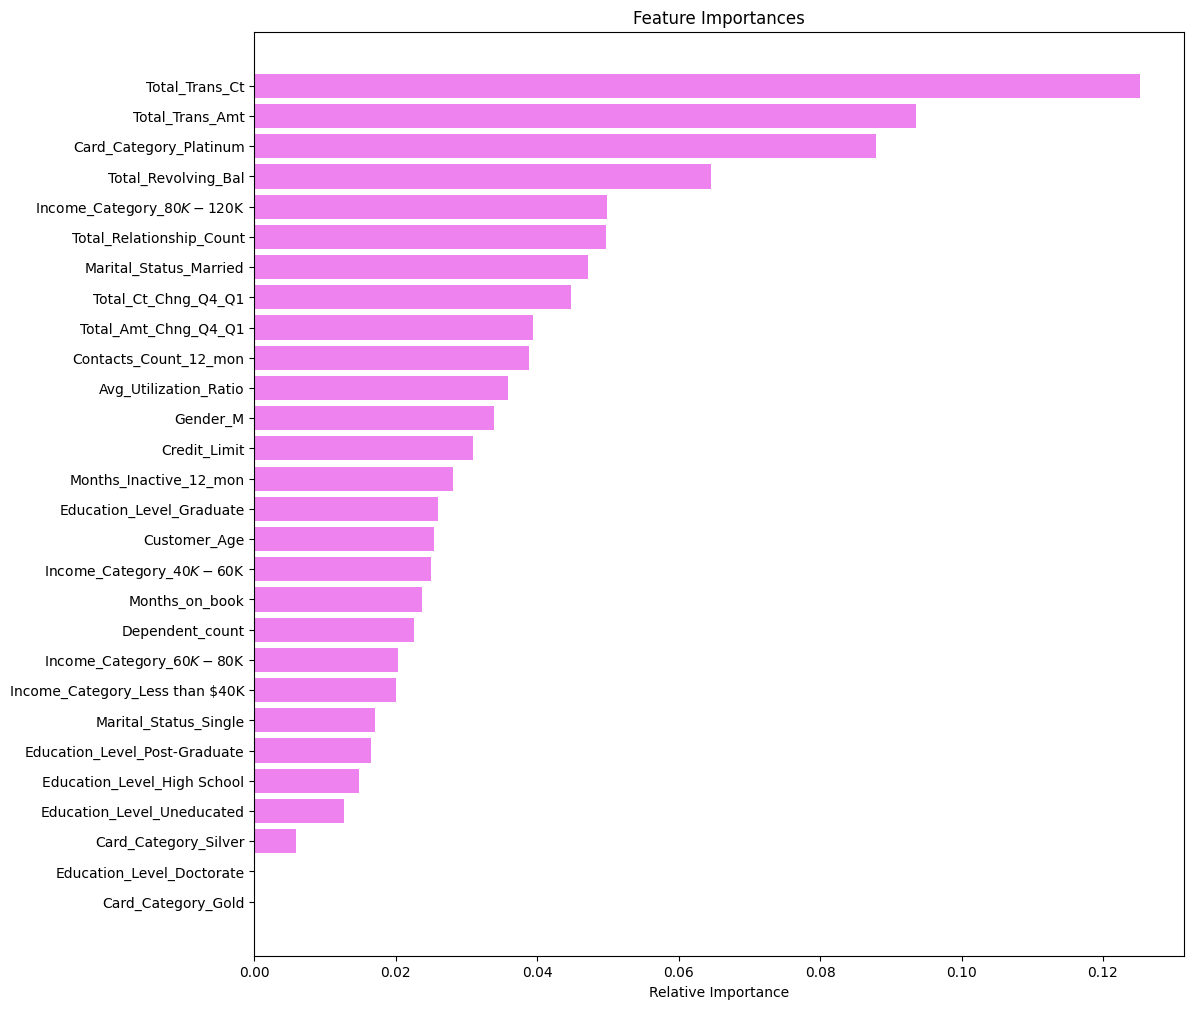

In [277]:
feature_names = X_train.columns
importances = tuned_xgb_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to XGB model, Total Transaction Count, Total Transaction Amount, and whether or not a customer holds platinum credit card are the most important features for making predictions.
* From EDA we know that only a small fraction of customers hold Platinum card, so this being a top three feature is a bit suspect.
* Lets check feature importances for gbm model (undersampled data).

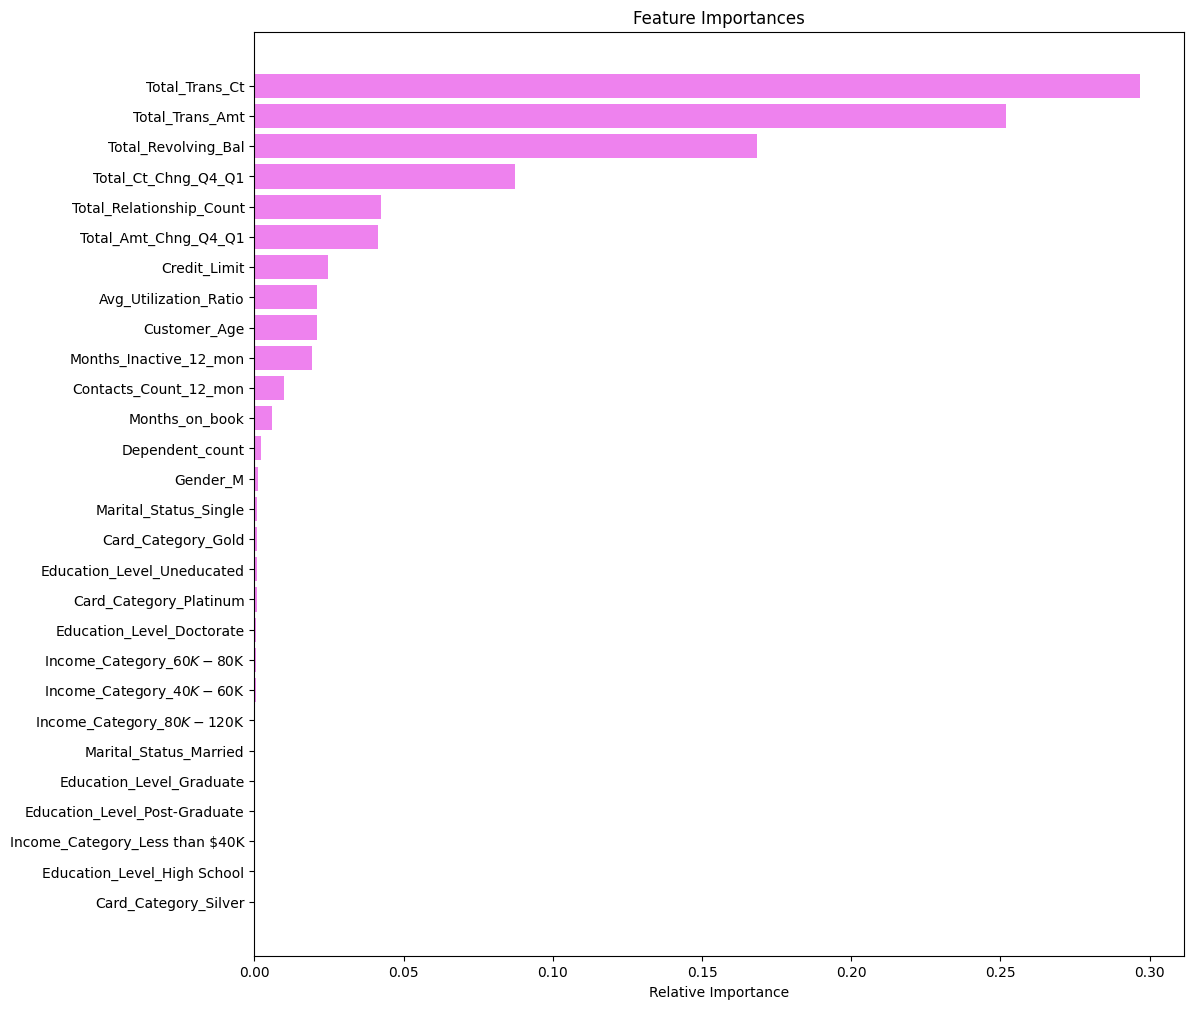

In [278]:
feature_names = X_train.columns
importances = tuned_gbm_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to this model, three most important features are Total Transaction count, Total Transaction amount, and Total Revolving Balance.
* These feature importances make sense, plus other performance metrics are better than for xgb model, while the difference in recall scores was very small. Let's consider this model the final model.

### Test set final performance

In [279]:
# Checking model's performance on test set
gbm_under_test = model_performance_classification_sklearn(tuned_gbm_un, X_test, y_test)
gbm_under_test

,Accuracy,Recall,Precision,F1
0,0.9447,0.971311,0.754777,0.849462


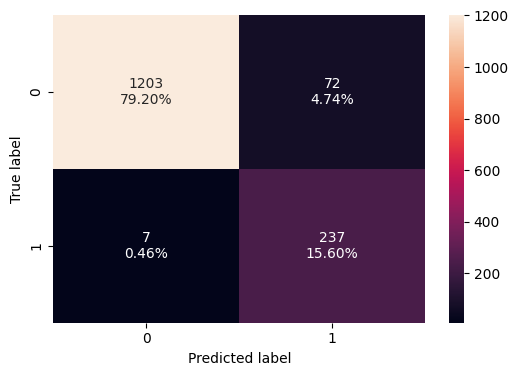

In [280]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_adb, X_test, y_test)

#### Feature Importance

Let's plot feature importances again for convenience.

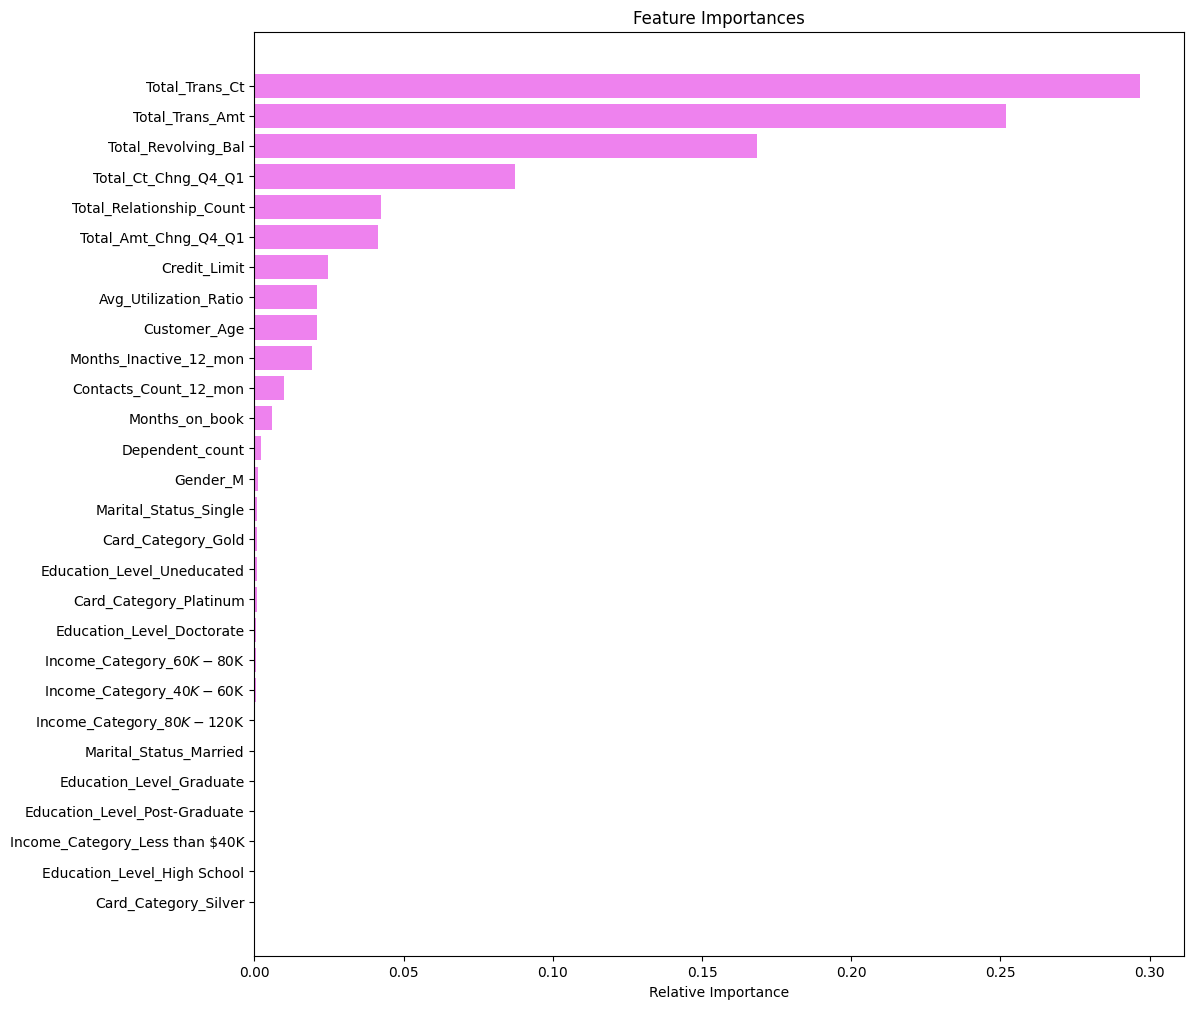

In [281]:
feature_names = X_train.columns
importances = tuned_gbm_un.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We can see that Total Transaction count, Total Transaction amount, Total Revolving Balance, and Count Change from Q4 to Q1 are important features for making predictions.

# Business Insights and Conclusions

* We have built a predictive model that can be used to predict what customers are likely to close their credit card accounts. Bank can target those customers with incentives such as cash back or lowered fees.
* We saw in our analysis that no new credit card accounts were opened in the last year. Bank should investigate why, and make some efforts to obtain new customers.
* Customers who had a large number of contacts with the bank had closed their credit card accounts. Bank should investigate those cases to obtain more insight into declining credit card usage.
* Bank should target customers making less that 40K a year (the largest income category) with offers tailored to that segment. For example cashback for paying rent could be a strong incentive.
* Bank needs to analyze credit cards offered by other banks, to ensure that incentives bank offers for opening and using their credit cards are competitive.


***